In [650]:
!pip install squarify 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline
!pip install circlify
import circlify

In [651]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Manipulación general de los datos

##2.1. Preparación de los datos

In [652]:
id='1Ap3pmeSdgQUEHXaNcUB3kxGZVTwjXHY8'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')

In [653]:
train_labels = pd.read_csv('train_labels.csv', encoding='latin-1')
train_labels.tail()

,building_id,damage_grade
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2
260600,747594,3


In [654]:
id='1EBZj8ChDcTigwwL7E7FPLGqYmvNGAanY'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')

In [655]:
train_values = pd.read_csv('train_values.csv', encoding='latin-1')
train_values.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260600,747594,21,9,9101,3,10,7,6,n,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,3,0,0,0,0,0,0,0,0,0,0,0


In [656]:
df = train_labels.merge(train_values, how = 'inner')

##2.2. Limpieza de los datos

###¿Hay valores nulos?



Obtenemos cantidad de datos del dataset original, elinamos los valores nulos y obtenemos nuevamente la cantidad total de datos del dataset.

In [657]:
df.size

10424040

In [658]:
df.dropna().size

10424040

Dataset sin valores nulos. 

###¿Hay edificaciones repetidas?



Obtenemos cantidad de edificaciones del dataset original, elinamos las que están duplicadas y obtenemos nuevamente la cantidad de edificaciones del dataset.

In [659]:
print(len(df))

260601


In [660]:
print(len(df.drop_duplicates()))

260601


Las edificaciones registradas son únicas.

#3. Pre análisis de los datos

##3.1. Exploración de datos

###¿Qué dimensiones tiene?

In [661]:
print(df.shape)

(260601, 40)


###¿Qué tipo de features contiene?




Obtenemos el nombre de las columnas del dataset por medio de columns.

In [662]:
df.columns

Index(['building_id', 'damage_grade', 'geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has

Vamos a encontrar distintos características respecto a las edificaciones. Algunas de ellas son: ubicación, construcción, usos secundarios, cantidad de personas que habitaban en las mismas, antiguedad.

###¿Cómo están representados los datos en las distintas features?




Aplicamos dtypes para conocer el datatype de cada columna.

In [663]:
df.dtypes

building_id                                int64
damage_grade                               int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_m

La información va a estar representada en forma numérica (int64) y categórica (object).

##3.2. Estructuras

###¿Cómo se representan los valores de las estructuras?


Nos quedamos con las columnas relacionadas con las estructuras y obtenemos sus datatypes.

In [664]:
train_structures = df[['damage_grade','has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']]

In [665]:
train_structures.dtypes

damage_grade                              int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick    int64
has_superstructure_timber                 int64
has_superstructure_bamboo                 int64
has_superstructure_rc_non_engineered      int64
has_superstructure_rc_engineered          int64
has_superstructure_other                  int64
dtype: object

In [666]:
train_structures['has_superstructure_adobe_mud'].value_counts()

0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64

In [667]:
adobe_mud_values = train_structures['has_superstructure_adobe_mud'].value_counts()

In [668]:
mud_mortar_stone_values = train_structures['has_superstructure_mud_mortar_stone'].value_counts()

In [669]:
stone_flag_values = train_structures['has_superstructure_stone_flag'].value_counts()

In [670]:
cement_mortar_stone_values = train_structures['has_superstructure_cement_mortar_stone'].value_counts()

In [671]:
mud_mortar_brick_values = train_structures['has_superstructure_mud_mortar_brick'].value_counts()

In [672]:
cement_mortar_brick_values = train_structures['has_superstructure_cement_mortar_brick'].value_counts()

In [673]:
timber_values = train_structures['has_superstructure_timber'].value_counts()

In [674]:
bamboo_values = train_structures['has_superstructure_bamboo'].value_counts()

In [675]:
rc_non_engineered_values = train_structures['has_superstructure_rc_non_engineered'].value_counts()

In [676]:
rc_engineered_values = train_structures['has_superstructure_rc_engineered'].value_counts()

In [677]:
other_values = train_structures['has_superstructure_other'].value_counts()

In [678]:
structures_values = adobe_mud_values.append(mud_mortar_stone_values).append(stone_flag_values).\
append(cement_mortar_stone_values).append(mud_mortar_brick_values).append(cement_mortar_brick_values).\
append(rc_non_engineered_values).append(timber_values).append(bamboo_values).append(rc_engineered_values).\
append(other_values)

Los valores son numéricos y pueden ser 0 y 1. El 0 indica que la edificación no tiene ese tipo de estructura y el 1 representa el caso contrario.

###¿Una edificación puede estar contruída por más de un tipo de material?



Teniendo en cuenta que los datos son numéricos (1 si la edificación tiene ese tipo de estructura y 0 si no), calculamos la cantidad de eficaciones construídas a partir de cada estructura y luego obtenemos el total.
Por otro lado, obtenemos la cantidad total de edificaciones presentes.
Finalmente, comparamos los valores obtenidos.

In [679]:
num_buildings = len(df)

In [680]:
num_buildings

260601

In [681]:
num_structures = train_structures.sum().sum()

In [682]:
num_structures

963774

Los resultados no coinciden por lo tanto una misma edificación puede estar construída a partir de más de un tipo de estructura.

###¿Cuántas edificaciones por cada estructura hay?

In [683]:
train_structures = train_structures.rename(columns={'has_superstructure_adobe_mud':'adobe - barro','has_superstructure_mud_mortar_stone':'barro - piedra',
                            'has_superstructure_stone_flag':'piedra','has_superstructure_cement_mortar_stone':'cemento - piedra',
                            'has_superstructure_mud_mortar_brick':'barro - ladrillo','has_superstructure_cement_mortar_brick':'cemento - ladrillo',
                            'has_superstructure_timber':'madera','has_superstructure_bamboo':'bambú (caña)','has_superstructure_rc_non_engineered':'concreto reforzado no-diseñado',
                            'has_superstructure_rc_engineered':'concreto reforzado diseñado','has_superstructure_other':'otro material'})

In [684]:
train_structures.sum()

damage_grade                      583296
adobe - barro                      23101
barro - piedra                    198561
piedra                              8947
cemento - piedra                    4752
barro - ladrillo                   17761
cemento - ladrillo                 19615
madera                             66450
bambú (caña)                       22154
concreto reforzado no-diseñado     11099
concreto reforzado diseñado         4133
otro material                       3905
dtype: int64

In [685]:
train_structures_ordered = train_structures.sum().sort_values()

In [686]:
train_structures_ordered

otro material                       3905
concreto reforzado diseñado         4133
cemento - piedra                    4752
piedra                              8947
concreto reforzado no-diseñado     11099
barro - ladrillo                   17761
cemento - ladrillo                 19615
bambú (caña)                       22154
adobe - barro                      23101
madera                             66450
barro - piedra                    198561
damage_grade                      583296
dtype: int64

In [687]:
train_structures_values = train_structures_ordered.values

In [688]:
train_structures_values

array([  3905,   4133,   4752,   8947,  11099,  17761,  19615,  22154,
        23101,  66450, 198561, 583296])

In [689]:
train_structures_index = train_structures_ordered.index

In [690]:
train_structures_index

Index(['otro material', 'concreto reforzado diseñado', 'cemento - piedra',
       'piedra', 'concreto reforzado no-diseñado', 'barro - ladrillo',
       'cemento - ladrillo', 'bambú (caña)', 'adobe - barro', 'madera',
       'barro - piedra', 'damage_grade'],
      dtype='object')

Text(0, 0.5, 'Materiales')

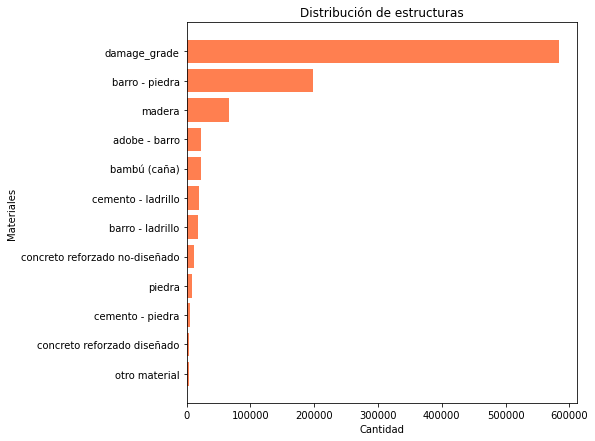

In [691]:
# Initialize a Figure and an Axes
fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(7,7)

# Create horizontal bars
ax.barh(y=train_structures_index, width=train_structures_values, color='coral');

# Add title
ax.set_title('Distribución de estructuras');
ax.set_xlabel('Cantidad')
ax.set_ylabel('Materiales')

Una observación a tener en cuenta es que una edificación puede estar construída a partir de más de una estructura por lo tanto la suma total de todas las cantidades no coincide con el total de edificaciones.

###¿Cuántas edificaciones construídas a partir de una estructura hay?

A diferencia de la pregunta cuestionada anteriormente, ahora queremos conocer la cantidad de edificios construídos exclusivamente por una estructura.

In [692]:
buildings_has_adobe_mud = train_structures.loc[(train_structures['adobe - barro'] == 1) & (train_structures['barro - piedra'] == 0) &\
                                        (train_structures['piedra'] == 0) & (train_structures['cemento - piedra'] == 0) &\
                                        (train_structures['barro - ladrillo'] == 0) & (train_structures['cemento - ladrillo'] == 0) &\
                                        (train_structures['concreto reforzado no-diseñado'] == 0) & (train_structures['madera'] == 0) &\
                                         (train_structures['bambú (caña)'] == 0) & (train_structures['concreto reforzado diseñado'] == 0) &\
                                          (train_structures['otro material'] == 0), ['damage_grade','adobe - barro']] 

In [693]:
num_buildings_has_adobe_mud = len(buildings_has_adobe_mud)

In [694]:
buildings_has_mud_mortar_stone = train_structures.loc[(train_structures['adobe - barro'] == 0) & (train_structures['barro - piedra'] == 1) & \
                                        (train_structures['piedra'] == 0) & (train_structures['cemento - piedra'] == 0) &\
                                        (train_structures['barro - ladrillo'] == 0) & (train_structures['cemento - ladrillo'] == 0) &\
                                        (train_structures['concreto reforzado no-diseñado'] == 0) & (train_structures['madera'] == 0) &\
                                         (train_structures['bambú (caña)'] == 0) & (train_structures['concreto reforzado diseñado'] == 0) &\
                                          (train_structures['otro material'] == 0), ['damage_grade','barro - piedra']] 

In [695]:
num_buildings_has_mud_mortar_stone = len(buildings_has_mud_mortar_stone)

In [696]:
buildings_has_stone_flag = train_structures.loc[(train_structures['adobe - barro'] == 0) & (train_structures['barro - piedra'] == 0) & \
                                        (train_structures['piedra'] == 1) & (train_structures['cemento - piedra'] == 0) &\
                                        (train_structures['barro - ladrillo'] == 0) & (train_structures['cemento - ladrillo'] == 0) &\
                                        (train_structures['concreto reforzado no-diseñado'] == 0) & (train_structures['madera'] == 0) &\
                                         (train_structures['bambú (caña)'] == 0) & (train_structures['concreto reforzado diseñado'] == 0) &\
                                          (train_structures['otro material'] == 0), ['damage_grade','piedra']] 

In [697]:
num_buildings_has_stone_flag = len(buildings_has_stone_flag)

In [698]:
buildings_has_cement_mortar_stone = train_structures.loc[(train_structures['adobe - barro'] == 0) & (train_structures['barro - piedra'] == 0) & \
                                        (train_structures['piedra'] == 0) & (train_structures['cemento - piedra'] == 1) &\
                                        (train_structures['barro - ladrillo'] == 0) & (train_structures['cemento - ladrillo'] == 0) &\
                                        (train_structures['concreto reforzado no-diseñado'] == 0) & (train_structures['madera'] == 0) &\
                                         (train_structures['bambú (caña)'] == 0) & (train_structures['concreto reforzado diseñado'] == 0) &\
                                          (train_structures['otro material'] == 0), ['damage_grade','cemento - piedra']] 

In [699]:
num_buildings_has_cement_mortar_stone = len(buildings_has_cement_mortar_stone)

In [700]:
buildings_has_mud_mortar_brick = train_structures.loc[(train_structures['adobe - barro'] == 0) & (train_structures['barro - piedra'] == 0) & \
                                        (train_structures['piedra'] == 0) & (train_structures['cemento - piedra'] == 0) &\
                                        (train_structures['barro - ladrillo'] == 1) & (train_structures['cemento - ladrillo'] == 0) &\
                                        (train_structures['concreto reforzado no-diseñado'] == 0) & (train_structures['madera'] == 0) &\
                                         (train_structures['bambú (caña)'] == 0) & (train_structures['concreto reforzado diseñado'] == 0) &\
                                          (train_structures['otro material'] == 0), ['damage_grade','barro - ladrillo']] 

In [701]:
num_buildings_has_mud_mortar_brick = len(buildings_has_mud_mortar_brick)

In [702]:
buildings_has_cement_mortar_brick = train_structures.loc[(train_structures['adobe - barro'] == 0) & (train_structures['barro - piedra'] == 0) & \
                                        (train_structures['piedra'] == 0) & (train_structures['cemento - piedra'] == 0) &\
                                        (train_structures['barro - ladrillo'] == 0) & (train_structures['cemento - ladrillo'] == 1) &\
                                        (train_structures['concreto reforzado no-diseñado'] == 0) & (train_structures['madera'] == 0) &\
                                         (train_structures['bambú (caña)'] == 0) & (train_structures['concreto reforzado diseñado'] == 0) &\
                                          (train_structures['otro material'] == 0), ['damage_grade','cemento - ladrillo']] 

In [703]:
num_buildings_has_cement_mortar_brick = len(buildings_has_cement_mortar_brick)

In [704]:
buildings_has_rc_non_engineered = train_structures.loc[(train_structures['adobe - barro'] == 0) & (train_structures['barro - piedra'] == 0) & \
                                        (train_structures['piedra'] == 0) & (train_structures['cemento - piedra'] == 0) &\
                                        (train_structures['barro - ladrillo'] == 0) & (train_structures['cemento - ladrillo'] == 0) &\
                                        (train_structures['concreto reforzado no-diseñado'] == 1) & (train_structures['madera'] == 0) &\
                                         (train_structures['bambú (caña)'] == 0) & (train_structures['concreto reforzado diseñado'] == 0) &\
                                          (train_structures['otro material'] == 0), ['damage_grade','concreto reforzado no-diseñado']] 

In [705]:
num_buildings_has_rc_non_engineered = len(buildings_has_rc_non_engineered)

In [706]:
buildings_has_timber = train_structures.loc[(train_structures['adobe - barro'] == 0) & (train_structures['barro - piedra'] == 0) & \
                                        (train_structures['piedra'] == 0) & (train_structures['cemento - piedra'] == 0) &\
                                        (train_structures['barro - ladrillo'] == 0) & (train_structures['cemento - ladrillo'] == 0) &\
                                        (train_structures['concreto reforzado no-diseñado'] == 0) & (train_structures['madera'] == 1) &\
                                         (train_structures['bambú (caña)'] == 0) & (train_structures['concreto reforzado diseñado'] == 0) &\
                                          (train_structures['otro material'] == 0), ['damage_grade','madera']] 

In [707]:
num_buildings_has_timber = len(buildings_has_timber)

In [708]:
buildings_has_bamboo = train_structures.loc[(train_structures['adobe - barro'] == 0) & (train_structures['barro - piedra'] == 0) & \
                                        (train_structures['piedra'] == 0) & (train_structures['cemento - piedra'] == 0) &\
                                        (train_structures['barro - ladrillo'] == 0) & (train_structures['cemento - ladrillo'] == 0) &\
                                        (train_structures['concreto reforzado no-diseñado'] == 0) & (train_structures['madera'] == 0) &\
                                         (train_structures['bambú (caña)'] == 1) & (train_structures['concreto reforzado diseñado'] == 0) &\
                                          (train_structures['otro material'] == 0), ['damage_grade','bambú (caña)']] 

In [709]:
num_buildings_has_bamboo = len(buildings_has_bamboo)

In [710]:
buildings_has_rc_engineered = train_structures.loc[(train_structures['adobe - barro'] == 0) & (train_structures['barro - piedra'] == 0) & \
                                        (train_structures['piedra'] == 0) & (train_structures['cemento - piedra'] == 0) &\
                                        (train_structures['barro - ladrillo'] == 0) & (train_structures['cemento - ladrillo'] == 0) &\
                                        (train_structures['concreto reforzado no-diseñado'] == 0) & (train_structures['madera'] == 0) &\
                                         (train_structures['bambú (caña)'] == 0) &(train_structures['concreto reforzado diseñado'] == 1) &\
                                          (train_structures['otro material'] == 0), ['damage_grade','concreto reforzado diseñado']] 

In [711]:
num_buildings_has_rc_engineered = len(buildings_has_rc_engineered)

In [712]:
buildings_has_other = train_structures.loc[(train_structures['adobe - barro'] == 0) & (train_structures['barro - piedra'] == 0) & \
                                        (train_structures['piedra'] == 0) & (train_structures['cemento - piedra'] == 0) &\
                                        (train_structures['barro - ladrillo'] == 0) & (train_structures['cemento - ladrillo'] == 0) &\
                                        (train_structures['concreto reforzado no-diseñado'] == 0) & (train_structures['madera'] == 0) &\
                                         (train_structures['bambú (caña)'] == 0) &(train_structures['concreto reforzado diseñado'] == 0) &\
                                          (train_structures['otro material'] == 1), ['damage_grade','otro material']] 

In [713]:
num_buildings_has_other = len(buildings_has_other)

In [714]:
structures_aux = pd.DataFrame({
    'adobe - mud': buildings_has_adobe_mud['adobe - barro'],
    'barro- piedra': buildings_has_mud_mortar_stone['barro - piedra'],
    'piedra': buildings_has_stone_flag['piedra'],
    'cemento - piedra': buildings_has_cement_mortar_stone['cemento - piedra'],
    'barro - ladrillo': buildings_has_mud_mortar_brick['barro - ladrillo'],
    'cemento - ladrillo': buildings_has_cement_mortar_brick['cemento - ladrillo'],
    'concreto reforzado no-diseñado': buildings_has_rc_non_engineered['concreto reforzado no-diseñado'],
    'madera': buildings_has_timber['madera'],
    'bambú (caña)': buildings_has_bamboo['bambú (caña)'],
    'concreto reforzado diseñado': buildings_has_rc_engineered['concreto reforzado diseñado'],
    'otro material': buildings_has_other['otro material'],
})

In [715]:
structures_aux = structures_aux.fillna(0)

In [716]:
structures_aux.sum()

adobe - mud                         7229.0
barro- piedra                     137134.0
piedra                              1228.0
cemento - piedra                     963.0
barro - ladrillo                    6144.0
cemento - ladrillo                 10106.0
concreto reforzado no-diseñado      4167.0
madera                              5145.0
bambú (caña)                         964.0
concreto reforzado diseñado         2594.0
otro material                        342.0
dtype: float64

In [717]:
structures_aux_ordered = structures_aux.sum().sort_values()

In [718]:
structures_aux_ordered

otro material                        342.0
cemento - piedra                     963.0
bambú (caña)                         964.0
piedra                              1228.0
concreto reforzado diseñado         2594.0
concreto reforzado no-diseñado      4167.0
madera                              5145.0
barro - ladrillo                    6144.0
adobe - mud                         7229.0
cemento - ladrillo                 10106.0
barro- piedra                     137134.0
dtype: float64

In [719]:
structures_aux_values = structures_aux_ordered.values

In [720]:
structures_aux_values

array([   342.,    963.,    964.,   1228.,   2594.,   4167.,   5145.,
         6144.,   7229.,  10106., 137134.])

In [721]:
structures_aux_index = structures_aux_ordered.index

In [722]:
structures_aux_index

Index(['otro material', 'cemento - piedra', 'bambú (caña)', 'piedra',
       'concreto reforzado diseñado', 'concreto reforzado no-diseñado',
       'madera', 'barro - ladrillo', 'adobe - mud', 'cemento - ladrillo',
       'barro- piedra'],
      dtype='object')

Text(0, 0.5, 'Materiales')

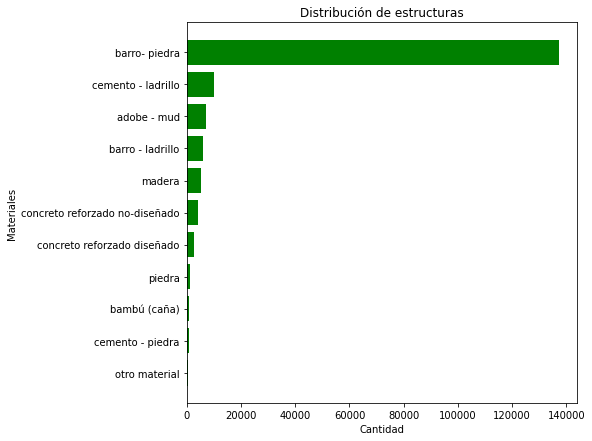

In [723]:
# Initialize a Figure and an Axes
fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(7,7)

# Create horizontal bars
ax.barh(y=structures_aux_index, width=structures_aux_values, color='green');

# Add title
ax.set_title('Distribución de estructuras');
ax.set_xlabel('Cantidad')
ax.set_ylabel('Materiales')

###¿Son más las edificaciones construídas a partir de una única estructura que las que tienen más estructuras?

Calculamos la cantidad de edificaciones formadas únicamente por un sólo material, las sumamos y obtenemos el total. La diferencia la cantidad total de edificaciones y del resultado hallado va a ser la cantidad de edificaciones compuestas por varios materiales.

In [724]:
num_buildings_by_one_structure = num_buildings_has_adobe_mud + num_buildings_has_mud_mortar_stone + num_buildings_has_stone_flag +\
num_buildings_has_cement_mortar_stone + num_buildings_has_mud_mortar_brick + num_buildings_has_cement_mortar_brick +\
num_buildings_has_timber + num_buildings_has_bamboo + num_buildings_has_rc_non_engineered + num_buildings_has_rc_engineered +\
 + num_buildings_has_other

In [725]:
num_buildings_by_one_structure

176016

In [726]:
num_buildings_by_more_structures = num_buildings - num_buildings_by_one_structure

In [727]:
num_buildings_by_more_structures

84585

In [728]:
num = [num_buildings_by_one_structure,num_buildings_by_more_structures]

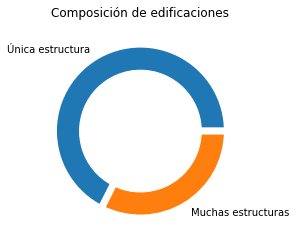

In [729]:
names = ['Única estructura','Muchas estructuras']
size = num
 
my_circle = plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Composición de edificaciones')

plt.show()

Consideramos que 'otro material' no es un material único.

##3.3. Sectorización

###¿Existe intersección entre sectores?

¿ Existe intersección entre sectores ? Quiero probar que el geo level 3 está contenido en geo level 2, que está contenido en el geo level 1.

Respuesta: No existe una interseccion porque la longitud por separado de cada uno de los geo_level coincide con la agrupación teniendo dos o tres criterios 

A C A*B --> A está contenido en la intereseccion de a con b


In [730]:
por_sector_3 = df.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id']).count()
por_sector_cantidad = por_sector_3.loc[:,['building_id']]
por_sector_cantidad.columns = ['cant_edificios']
len(por_sector_cantidad)

11595

In [731]:
por_sector_2 = df.groupby(['geo_level_1_id','geo_level_2_id']).count()
por_sector_cantidad = por_sector_2.loc[:,['building_id']]
por_sector_cantidad.columns = ['cant_edificios']
len(por_sector_cantidad)

1414

In [732]:
por_sector_1 = df.groupby(['geo_level_1_id']).count()
por_sector_cantidad = por_sector_1.loc[:,['building_id']]
por_sector_cantidad.columns = ['cant_edificios']
len(por_sector_cantidad)

31

In [733]:
cant_geo_level_2 = len(df.groupby('geo_level_2_id'))
cant_geo_level_2


1414

In [734]:
cant_geo_level_3 = len(df.groupby('geo_level_3_id'))
cant_geo_level_3

11595

###Cantidad de edificios geo level 1


In [735]:
#agrupo por tipo id del sector más general
df_geolvl1 = df.loc[:,['geo_level_1_id','age']]
df_geolvl1 = df_geolvl1.rename(columns={'age' : 'cant_edificios'})
df_geolvl1 = df_geolvl1.groupby(['geo_level_1_id']).count().reset_index()
df_geolvl1

,geo_level_1_id,cant_edificios
0,0,4011
1,1,2701
2,2,931
3,3,7540
4,4,14568
5,5,2690
6,6,24381
7,7,18994
8,8,19080
9,9,3958


<BarContainer object of 31 artists>

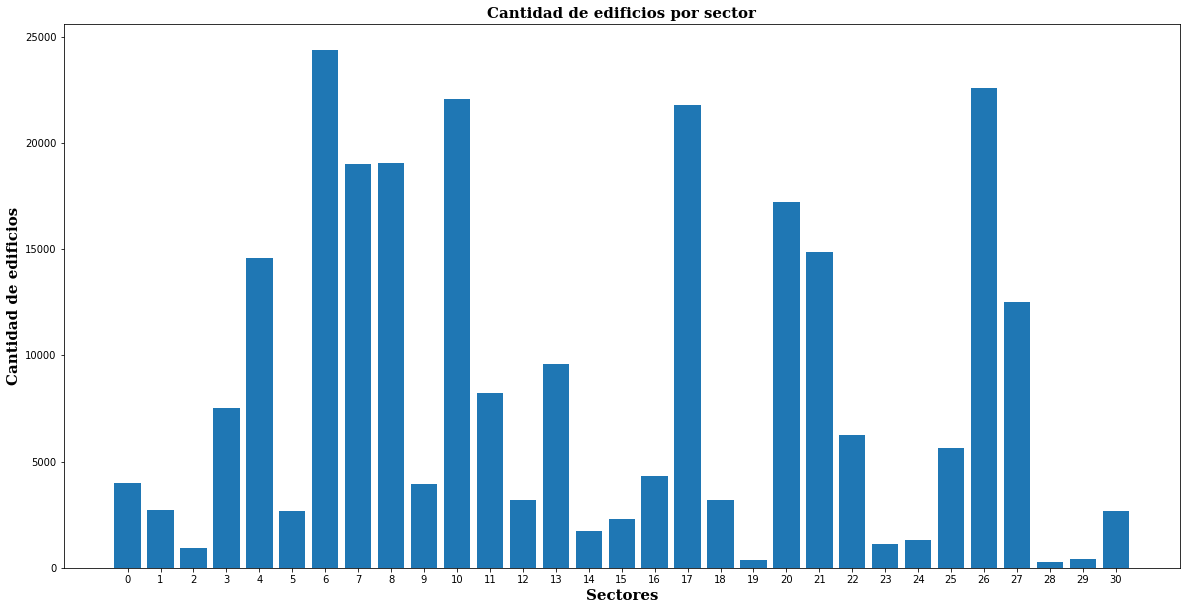

In [736]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'25'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (20,10) 
plt.title("Cantidad de edificios por sector", 
          fontdictAxes)

plt.xlabel('Sectores',fontdict=fontdictAxes)
plt.ylabel('Cantidad de edificios',fontdict=fontdictAxes)
 
# Create names on the x axis
plt.xticks(np.arange(len(df_geolvl1)), df_geolvl1.geo_level_1_id)
plt.bar(np.arange(len(df_geolvl1)),df_geolvl1.cant_edificios)

##3.4 Antigüedad

###¿Cual es la distribucion de los edificios segun su antiguedad?

In [737]:
df['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

Text(0, 0.5, 'Cantidad')

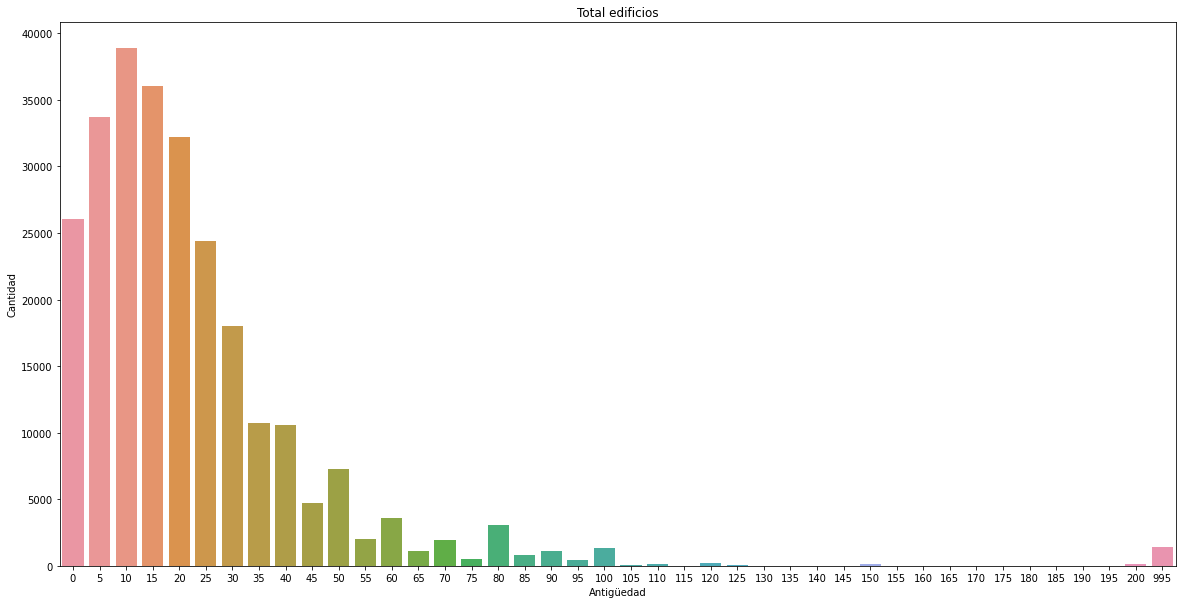

In [738]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["age"])
plt.title("Total edificios")
plt.xlabel("Antigüedad")
plt.ylabel("Cantidad")

Podemos observar que la mayoria de los edifcios tienen 15 años de antiguedad.

#4. Análisis de daños

###¿Cómo se representa la información de los daños?



Nos quedamos con la columna correspondiente a 'damage_grade' del dataset original. Obtenemos su datatype.

In [739]:
damage_grade = df['damage_grade']

In [740]:
damage_grade.dtype

dtype('int64')

Los valores son numéricos.

###¿Qué grado de daño predomina?



Obtenemos los valores y número de veces que parecen los distintos grados de daños.

In [741]:
damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

Observamos que el daño 2 (medio) es el que se presenta en la mayor cantidad de edificaciones, duplicando aproximadamente al daño 3 (serio) que es el que le sigue. Por útimo, con considerable menor frecuencia aparece el daño 1 (bajo).

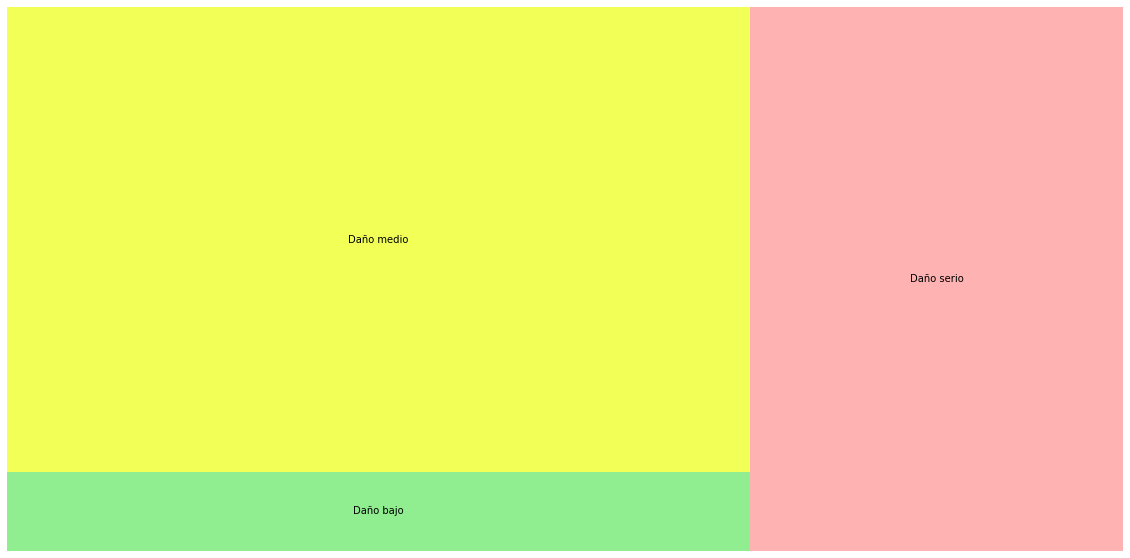

In [742]:
damage = df.groupby('damage_grade').count()[['building_id']].rename(index={1:'Daño bajo',2:'Daño medio',3:'Daño serio'},columns={'building_id':'count'}).reset_index()
squarify.plot(sizes=damage['count'], label=damage['damage_grade'],color=['lightgreen','#F2FF57','#FFB2B2'])
plt.axis('off')
plt.show()

Text(0.5, 0, 'Daño')

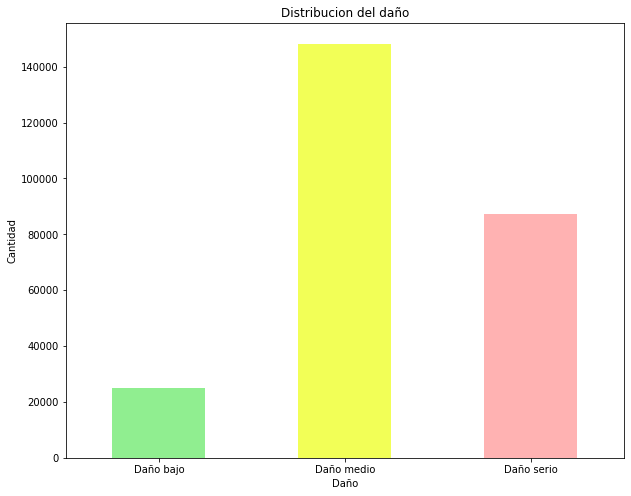

In [743]:
#Cantidad de edificions con cada daño:
damage = df.groupby('damage_grade').count()[['building_id']].rename(index={1:'Daño bajo',2:'Daño medio',3:'Daño serio'},columns={'building_id':'count'})
damage['count'].plot(kind='bar',figsize=(10,8),rot=360,title='Distribucion del daño',color=['lightgreen','#F2FF57','#FFB2B2']);
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Daño')



Se puede observar que la mayoria de los edificios sufrieron un daño medio, seguidos por edificios con un daño serio y por ultimo la menor cantidad sufrio un daño bajo.

##4.1. Antigüedad

###¿Los edificios más antiguos son los que más daño sufrieron?

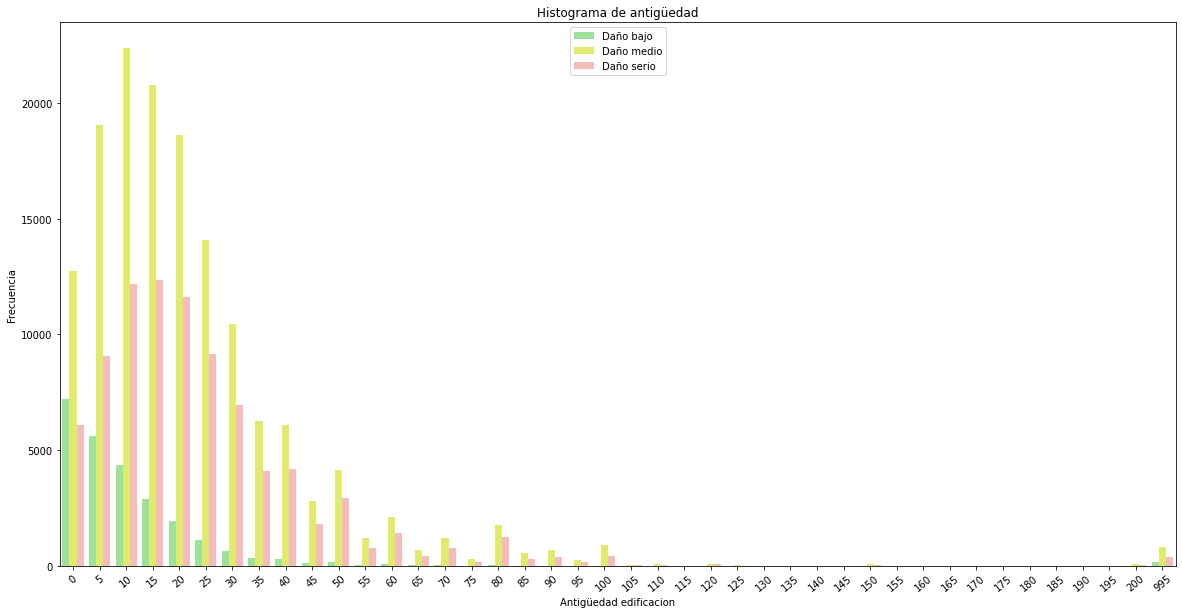

In [744]:
#Cantidad de edificios con cada daño por antigüedad del edificio.
plt.figure(figsize=(20,10))
sns.countplot(x=df["age"],hue=df["damage_grade"],palette=['lightgreen','#F2FF57','#FFB2B2'])
plt.ylabel("Frecuencia")
plt.xlabel("Antigüedad edificacion")
plt.xticks(rotation=40)
plt.title("Histograma de antigüedad")
plt.legend(["Daño bajo","Daño medio","Daño serio"])
plt.show()


In [745]:
df_antiguedad = df[['damage_grade','age']]
df_antiguedad['value'] = 1
df_antiguedad = df_antiguedad.pivot_table(index='damage_grade',columns='age',values='value',aggfunc='sum',fill_value=0).T.rename(columns={1:'Daño bajo',2:'Daño medio',3:'Daño serio'}).rename_axis(columns='Tipo de daño')

df_antiguedad['Daño_bajo_promedio'] = df_antiguedad['Daño bajo']*100/(df_antiguedad['Daño bajo']+df_antiguedad['Daño medio']+df_antiguedad['Daño serio'])
df_antiguedad['Daño_medio_promedio'] = df_antiguedad['Daño medio']*100/(df_antiguedad['Daño bajo']+df_antiguedad['Daño medio']+df_antiguedad['Daño serio'])
df_antiguedad['Daño_serio_promedio'] = df_antiguedad['Daño serio']*100/(df_antiguedad['Daño bajo']+df_antiguedad['Daño medio']+df_antiguedad['Daño serio'])

df_antiguedad = df_antiguedad[['Daño_bajo_promedio','Daño_medio_promedio','Daño_serio_promedio']]
df_antiguedad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Tipo de daño,Daño_bajo_promedio,Daño_medio_promedio,Daño_serio_promedio
age,,,
0,27.698629,48.849891,23.451480
5,16.589014,56.473870,26.937116
10,11.209379,57.512341,31.278281
15,7.992224,57.670092,34.337684
20,6.071717,57.805606,36.122677
25,4.641714,57.756710,37.601576
30,3.550033,57.932106,38.517861
35,3.286648,58.319328,38.394024
40,2.680178,57.656975,39.662847


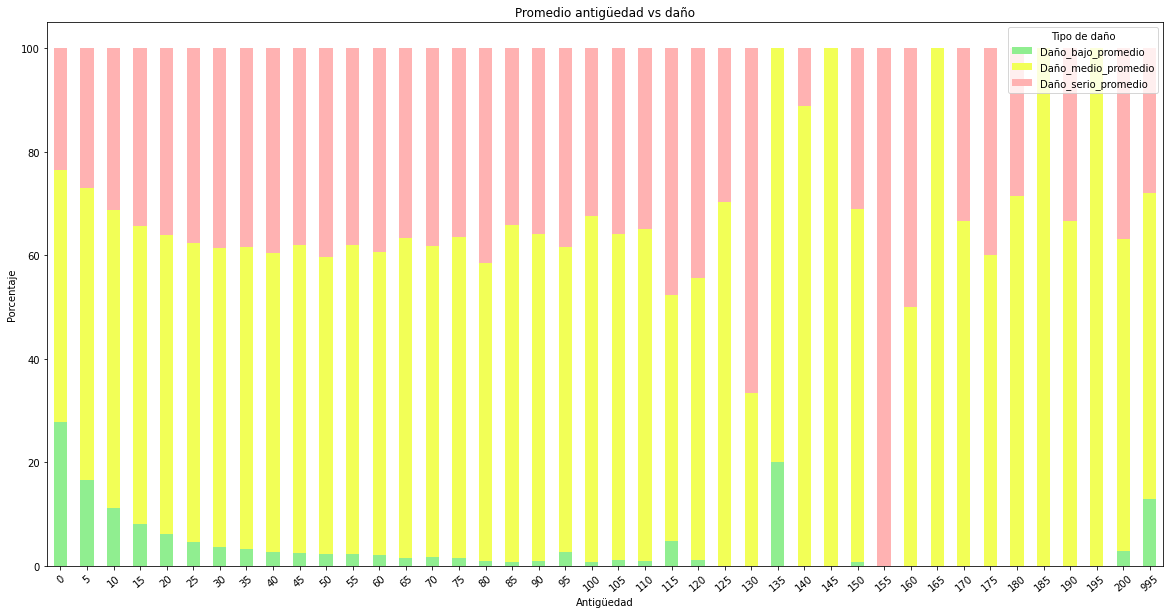

In [746]:
df_antiguedad.plot(kind='bar',stacked=True,figsize=(20,10),rot=40,title='Promedio antigüedad vs daño',color=['lightgreen','#F2FF57','#FFB2B2'])
ax=plt.gca()
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Antigüedad')
ax.set_facecolor('xkcd:white')


Se analiza cuantos edificios sufrieron cada tipo de daño y su porcentaje. Los edificios con daños mas serios son los mas viejosEl daño mas bajo se da en los edificios mas nuevos y se puede ver como va decreciendo a medida que sube la antiguedad del edificio.

##4.2. Estructura

In [747]:
structures_with_damage = buildings_has_adobe_mud.append(buildings_has_mud_mortar_stone).append(buildings_has_stone_flag).\
append(buildings_has_cement_mortar_stone).append(buildings_has_mud_mortar_brick).append(buildings_has_cement_mortar_brick).\
append(buildings_has_rc_non_engineered).append(buildings_has_timber).append(buildings_has_bamboo).append(buildings_has_rc_engineered).\
append(buildings_has_other)

In [748]:
structures_with_damage = structures_with_damage.fillna(0)

In [749]:
structures_with_damage

,damage_grade,adobe - barro,barro - piedra,piedra,cemento - piedra,barro - ladrillo,cemento - ladrillo,concreto reforzado no-diseñado,madera,bambú (caña),concreto reforzado diseñado,otro material
4,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
257705,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
257919,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
258158,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
259355,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [750]:
structures = structures_with_damage.rename(columns={'has_superstructure_adobe_mud':'adobe - barro','has_superstructure_mud_mortar_stone':'barro - piedra',
                            'has_superstructure_stone_flag':'piedra','has_superstructure_cement_mortar_stone':'cemento - piedra',
                            'has_superstructure_mud_mortar_brick':'barro - ladrillos','has_superstructure_cement_mortar_brick':'cemento - ladrillos',
                            'has_superstructure_timber':'madera','has_superstructure_bamboo':'bambú (caña)','has_superstructure_rc_non_engineered':'concreto reforzado no-diseñado',
                            'has_superstructure_rc_engineered':'concreto reforzado diseñado','has_superstructure_other':'otro material'})

###¿Cuántos edificios contruídos a partir de una estructura sufrieron cada tipo de grado de daño?

In [751]:
structures_by_damage = structures.groupby('damage_grade').sum()

In [752]:
structures_by_damage

,adobe - barro,barro - piedra,piedra,cemento - piedra,barro - ladrillo,cemento - ladrillo,concreto reforzado no-diseñado,madera,bambú (caña),concreto reforzado diseñado,otro material
damage_grade,,,,,,,,,,,
1,244.0,4946.0,15.0,159.0,266.0,4169.0,2307.0,2236.0,398.0,1774.0,180.0
2,4126.0,75831.0,494.0,633.0,4149.0,5514.0,1756.0,2461.0,472.0,773.0,111.0
3,2859.0,56357.0,719.0,171.0,1729.0,423.0,104.0,448.0,94.0,47.0,51.0


###Teniendo en cuenta la estuctura de construcción, ¿cuáles son las edificaciones que sufrieron mayor daño?

In [753]:
structures_by_damage_stone = structures_by_damage.reset_index().loc[:,['damage_grade','piedra']]

In [754]:
structures_by_damage_stone

,damage_grade,piedra
0,1,15.0
1,2,494.0
2,3,719.0


Text(0.5, 0, 'Daño')

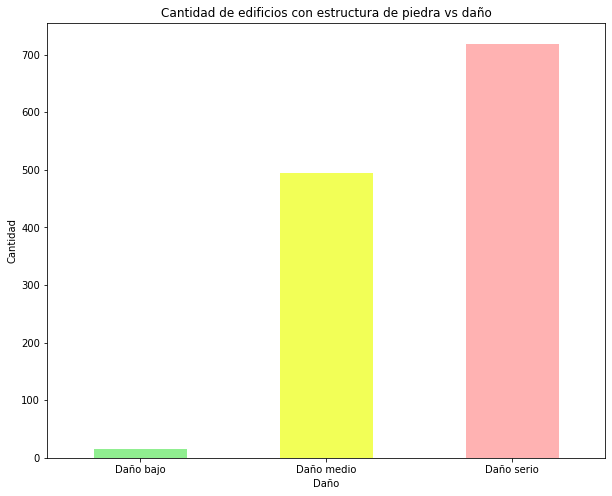

In [755]:
damage = structures[['damage_grade','piedra']].groupby('damage_grade').sum().rename(index={1:'Daño bajo',2:'Daño medio',3:'Daño serio'})
damage['piedra'].plot(kind='bar',figsize=(10,8),rot=360,title='Cantidad de edificios con estructura de piedra vs daño',color=['lightgreen','#F2FF57','#FFB2B2']);
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Daño')

Las edificaciones construídas a base de piedra tuvieron en mayor parte daño serio.

###¿Y las que tuvieron menos impacto?

In [756]:
structures_by_damage_rc = structures_by_damage.reset_index().loc[:,['damage_grade','concreto reforzado diseñado']]

In [757]:
structures_by_damage_rc

,damage_grade,concreto reforzado diseñado
0,1,1774.0
1,2,773.0
2,3,47.0


Text(0.5, 0, 'Daño')

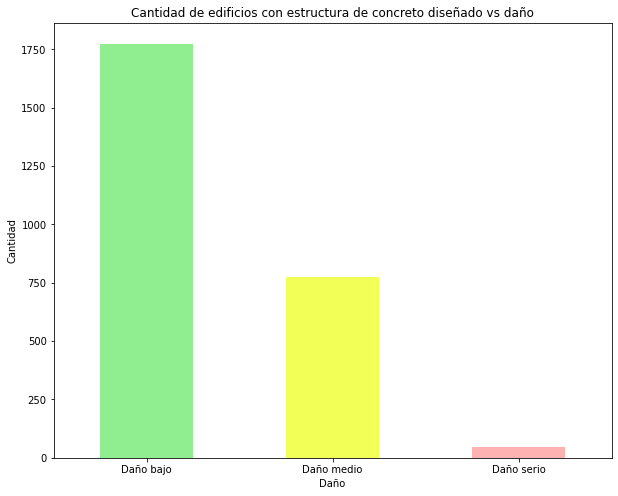

In [758]:
damage = structures[['damage_grade','concreto reforzado diseñado']].groupby('damage_grade').sum().rename(index={1:'Daño bajo',2:'Daño medio',3:'Daño serio'})
damage['concreto reforzado diseñado'].plot(kind='bar',figsize=(10,8),rot=360,title='Cantidad de edificios con estructura de concreto diseñado vs daño',color=['lightgreen','#F2FF57','#FFB2B2']);
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Daño')

In [759]:
structures_by_damage_non_rc = structures_by_damage.reset_index().loc[:,['damage_grade','concreto reforzado no-diseñado']]

In [760]:
structures_by_damage_non_rc

,damage_grade,concreto reforzado no-diseñado
0,1,2307.0
1,2,1756.0
2,3,104.0


Text(0.5, 0, 'Daño')

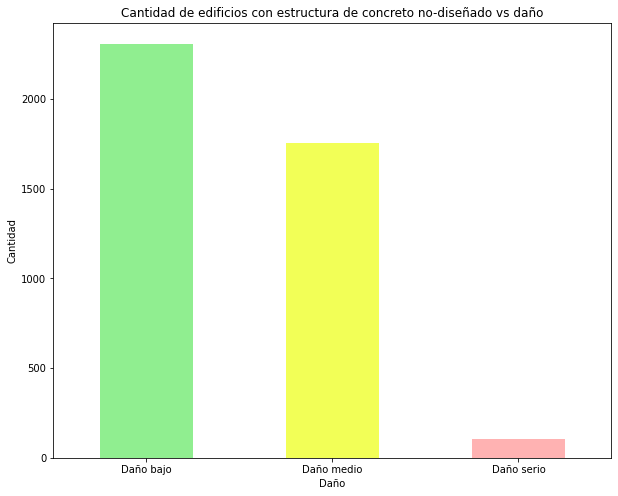

In [761]:
damage = structures[['damage_grade','concreto reforzado no-diseñado']].groupby('damage_grade').sum().rename(index={1:'Daño bajo',2:'Daño medio',3:'Daño serio'})
damage['concreto reforzado no-diseñado'].plot(kind='bar',figsize=(10,8),rot=360,title='Cantidad de edificios con estructura de concreto no-diseñado vs daño',color=['lightgreen','#F2FF57','#FFB2B2']);
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Daño')

Las edificaciones con estructuras del tipo concreto reforzado diseñado y no-diseñado recibieron mayor daño bajo que cualquier otro daño tras el fenómeno ocurrido.

In [762]:
structures_by_damage_aux = structures_by_damage.T.rename(columns={1:'Daño bajo',2:'Daño medio',3:'Daño serio'}).rename_axis(columns='Tipo de daño')

In [763]:
structures_by_damage_aux

Tipo de daño,Daño bajo,Daño medio,Daño serio
adobe - barro,244.0,4126.0,2859.0
barro - piedra,4946.0,75831.0,56357.0
piedra,15.0,494.0,719.0
cemento - piedra,159.0,633.0,171.0
barro - ladrillo,266.0,4149.0,1729.0
cemento - ladrillo,4169.0,5514.0,423.0
concreto reforzado no-diseñado,2307.0,1756.0,104.0
madera,2236.0,2461.0,448.0
bambú (caña),398.0,472.0,94.0
concreto reforzado diseñado,1774.0,773.0,47.0


Observamos que los edificios están construídos en su mayor proporción por barro y piedra y que la mayoría de ellos sufrieron daño medio. Esto se visualiza además en cada tipo de estructura.

###Daño independientemente de la estructura

In [764]:
damage_1 = structures.loc[structures['damage_grade'] == 1,:].groupby('damage_grade').sum().sum().sum()

In [765]:
damage_2 = structures.loc[structures['damage_grade'] == 2,:].groupby('damage_grade').sum().sum().sum()

In [766]:
damage_3 = structures.loc[structures['damage_grade'] == 3,:].groupby('damage_grade').sum().sum().sum()

In [767]:
total_damage = [damage_1,damage_2,damage_3]

In [768]:
structures_by_damage['total_damage'] = total_damage

In [769]:
total_structures_by_damage = structures_by_damage.loc[:,['total_damage']]

In [770]:
total_structures_by_damage

,total_damage
damage_grade,
1,16694.0
2,96320.0
3,63002.0


In [771]:
total_structures_ordered = total_structures_by_damage['total_damage'].sort_values()

In [772]:
total_structures_ordered

damage_grade
1    16694.0
3    63002.0
2    96320.0
Name: total_damage, dtype: float64

In [773]:
total_structures = total_structures_ordered.values

In [774]:
total_structures

array([16694., 63002., 96320.])

In [775]:
damage = total_structures_ordered.index.astype(str)

In [776]:
damage

Index(['1', '3', '2'], dtype='object', name='damage_grade')

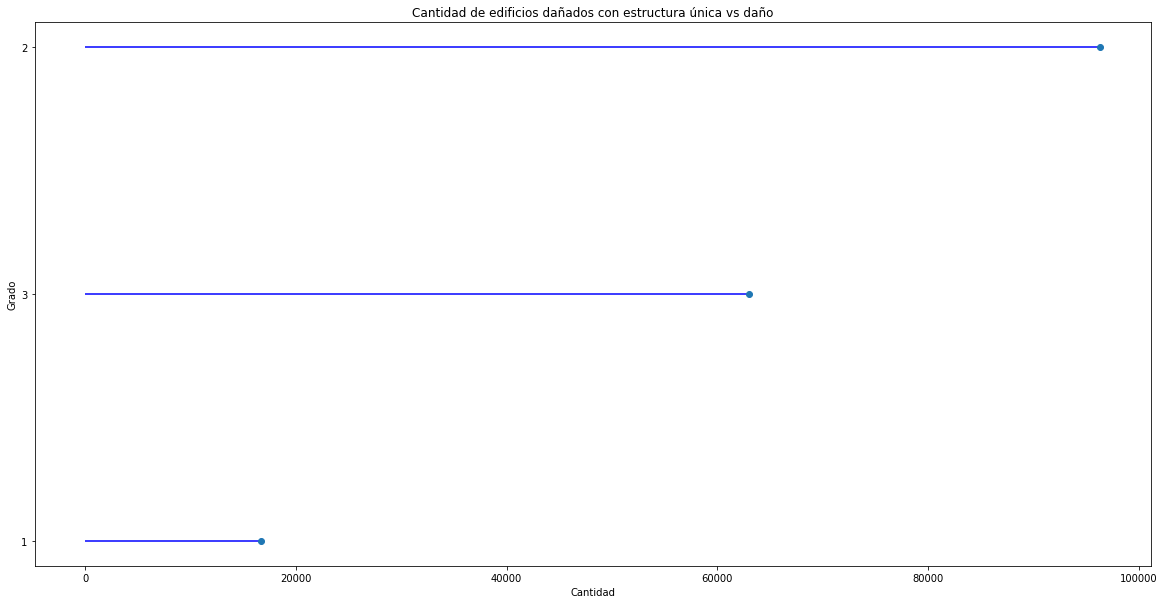

In [777]:
plt.hlines(y=damage, xmin=0, xmax=total_structures, color='blue')
plt.plot(total_structures,damage,'o')
 
plt.title("Cantidad de edificios dañados con estructura única vs daño", loc='center')
plt.xlabel('Cantidad')
plt.ylabel('Grado')

plt.show()

Independientemente del material, las edificaciones sufrieron en su mayor proporción daño medio, luego daño serio y por último daño leve.

##4.3. Localización

### Porcentajes según el tipo de destrucción por zonas

¿Cuál fue el porcentaje de destrucción para cada zona?
- El mayor porcentaje de destrucción esta centrado en las de grado dos
- Muy poco de grado 1
- Grado 3 bastante irregular
- Hay zonas particulares de grado 3 que sufrieron el mayor daño



#### Porcentaje Grado 1

In [778]:
daño1 = df.loc[(df.damage_grade == 1),['building_id','damage_grade','geo_level_1_id']]
daño1 = daño1.groupby('geo_level_1_id').count().reset_index()\
.loc[:,['geo_level_1_id','building_id']].rename(columns = {'building_id':'cant_edificios_rotos'})

In [779]:
porcentajeDestruc1 = daño1.merge(df_geolvl1, how='inner')
porcentajeDestruc1['porcentaje'] = (porcentajeDestruc1.cant_edificios_rotos*100)/porcentajeDestruc1.cant_edificios
porcentajeDestruc1

,geo_level_1_id,cant_edificios_rotos,cant_edificios,porcentaje
0,0,337,4011,8.401895
1,1,411,2701,15.216586
2,2,85,931,9.129968
3,3,245,7540,3.249337
4,4,521,14568,3.576332
5,5,446,2690,16.579926
6,6,2108,24381,8.646077
7,7,1033,18994,5.438560
8,8,654,19080,3.427673
9,9,561,3958,14.173825


#### Porcentaje grado 2

In [780]:
daño2 = df.loc[(df.damage_grade == 2),['building_id','damage_grade','geo_level_1_id']]
daño2 = daño2.groupby('geo_level_1_id').count().reset_index()\
.loc[:,['geo_level_1_id','building_id']].rename(columns = {'building_id':'cant_edificios_rotos'})

In [781]:
porcentajeDestruc2 = daño2.merge(df_geolvl1, how='inner')
porcentajeDestruc2['porcentaje'] = (porcentajeDestruc2.cant_edificios_rotos*100)/porcentajeDestruc2.cant_edificios

#### Porcentaje grado 3

In [782]:
daño3 = df.loc[(df.damage_grade == 3),['building_id','damage_grade','geo_level_1_id']]
daño3 = daño3.groupby('geo_level_1_id').count().reset_index()\
.loc[:,['geo_level_1_id','building_id']].rename(columns = {'building_id':'cant_edificios_rotos'})

In [783]:
porcentajeDestruc = daño3.merge(df_geolvl1, how='inner')
porcentajeDestruc['porcentaje'] = (porcentajeDestruc.cant_edificios_rotos*100)/porcentajeDestruc.cant_edificios
porcentajeDestruc

,geo_level_1_id,cant_edificios_rotos,cant_edificios,porcentaje
0,0,599,4011,14.933932
1,1,305,2701,11.292114
2,2,236,931,25.349087
3,3,2745,7540,36.405836
4,4,2883,14568,19.789951
5,5,230,2690,8.550186
6,6,6051,24381,24.818506
7,7,6688,18994,35.211119
8,8,9913,19080,51.954927
9,9,664,3958,16.776150


#### Grafico porcentaje

In [784]:
porcentajeDestruc1_1 = porcentajeDestruc1.rename(columns={'porcentaje':'porcentaje_1'}).loc[:,['geo_level_1_id','porcentaje_1']]
porcentajeDestruc2_1 = porcentajeDestruc2.rename(columns={'porcentaje':'porcentaje_2'}).loc[:,['geo_level_1_id','porcentaje_2']]
porcentajeDestruc3_1 = porcentajeDestruc.rename(columns={'porcentaje':'porcentaje_3'}).loc[:,['geo_level_1_id','porcentaje_3']]

porcentajeDestrucMod = porcentajeDestruc1_1.merge(porcentajeDestruc2_1,how='outer').merge(porcentajeDestruc3_1,how='inner').fillna(0).sort_values('geo_level_1_id').set_index('geo_level_1_id')
porcentajeDestrucMod

,porcentaje_1,porcentaje_2,porcentaje_3
geo_level_1_id,,,
0,8.401895,76.664174,14.933932
1,15.216586,73.491300,11.292114
2,9.129968,65.520945,25.349087
3,3.249337,60.344828,36.405836
4,3.576332,76.633718,19.789951
5,16.579926,74.869888,8.550186
6,8.646077,66.535417,24.818506
7,5.438560,59.350321,35.211119
8,3.427673,44.617400,51.954927


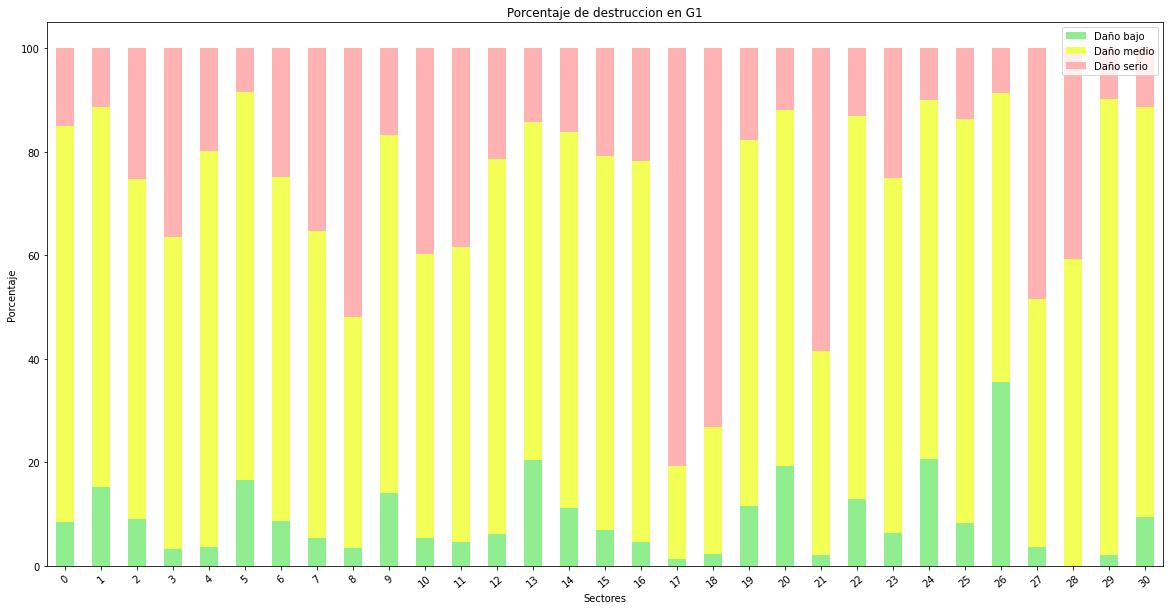

In [785]:
porcentajeDestrucMod[['porcentaje_1','porcentaje_2','porcentaje_3']].plot(kind='bar',stacked=True,figsize=(20,10),rot=40,title='Porcentaje de destruccion en G1',color=['lightgreen','#F2FF57','#FFB2B2'])
ax=plt.gca()
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Sectores')
ax.set_facecolor('xkcd:white')
ax.legend(['Daño bajo','Daño medio','Daño serio'])

### Top 3 cantidad edificio para cada uno de los daños

¿ Teniendo en cuenta la cantidad, cuantos edificios sufrieron cada daño?

- Como la cantidad de edificios es variada según la zona, no se mantiene la consistencia con los porcentajes
- Se puede ver que la mayoria de los edificios sufrio grado 3, despues gardo 2, despues grado 1 (ver radio de los circulos)
- Hay zonas que se repiten. ¿Que significa? Esas zonas tienne muchos más edificios que el resto de las zonas, con lo cual su cantidad de edificios aparece como protagonista en más de una circunferencia.


In [786]:
#Filtro para que me quede solo el los edificios de geolvl1
df_geolvl1 = df.loc[:,['geo_level_1_id','damage_grade','age']]
df_geolvl1 = df_geolvl1.rename(columns={'age' : 'cant_edificios'})
df_geolvl1 = df_geolvl1.groupby(['geo_level_1_id','damage_grade']).count()
df_geolvl1dmg = df_geolvl1.reset_index()
df_geolvl1dmg

,geo_level_1_id,damage_grade,cant_edificios
0,0,1,337
1,0,2,3075
2,0,3,599
3,1,1,411
4,1,2,1985
...,...,...,...
87,29,2,349
88,29,3,39
89,30,1,252
90,30,2,2127


In [787]:
#Saco los top 3 dependiendo del grado
top3daño1 = df_geolvl1dmg.loc[(df_geolvl1dmg.damage_grade == 1),['geo_level_1_id','cant_edificios']].nlargest(3,'cant_edificios')
top3daño2 = df_geolvl1dmg.loc[(df_geolvl1dmg.damage_grade == 2),['geo_level_1_id','cant_edificios']].nlargest(3,'cant_edificios')
top3daño3 = df_geolvl1dmg.loc[(df_geolvl1dmg.damage_grade == 3),['geo_level_1_id','cant_edificios']].nlargest(3,'cant_edificios')

In [788]:
#Uno todos y genero lista para usar despues en el grafico
top3daños = top3daño1.merge(top3daño2,how='outer').merge(top3daño3,how='outer')
nombresDaños = top3daños['geo_level_1_id'].to_list()
valoresDaños = top3daños['cant_edificios'].to_list()

In [789]:
cantEdificiosPorCategorias = df.loc[:,['building_id','damage_grade']].groupby('damage_grade').count()
totalEdificios = cantEdificiosPorCategorias.sum().sum()
cantEdificiosPorCategorias

,building_id
damage_grade,
1,25124
2,148259
3,87218


In [790]:
data = [{'id': 'Edificios Totales', 'datum': totalEdificios, 'children' : [
              {'id' : "", 'datum': cantEdificiosPorCategorias['building_id'][1],
                   'children' : [
                     {'id' : nombresDaños[0], 'datum' : valoresDaños[0]},
                     {'id' : nombresDaños[1],'datum' : valoresDaños[1]},
                     {'id' : nombresDaños[2], 'datum' : valoresDaños[2]}
                   ]},
              {'id' : "",'datum': cantEdificiosPorCategorias['building_id'][2], 
                   'children' : [
                     {'id' : nombresDaños[3], 'datum' : valoresDaños[3]},
                     {'id' : nombresDaños[4], 'datum' : valoresDaños[4]},
                     {'id' : nombresDaños[5], 'datum' : valoresDaños[5]}
                   ]},
              {'id' : "",'datum': cantEdificiosPorCategorias['building_id'][3],  
                   'children' : [
                     {'id' : nombresDaños[6], 'datum' : valoresDaños[6]},
                     {'id' : nombresDaños[7], 'datum' : valoresDaños[7]},
                     {'id' : nombresDaños[8], 'datum' : valoresDaños[8]}
                   ]},
    ]}]


In [791]:
# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

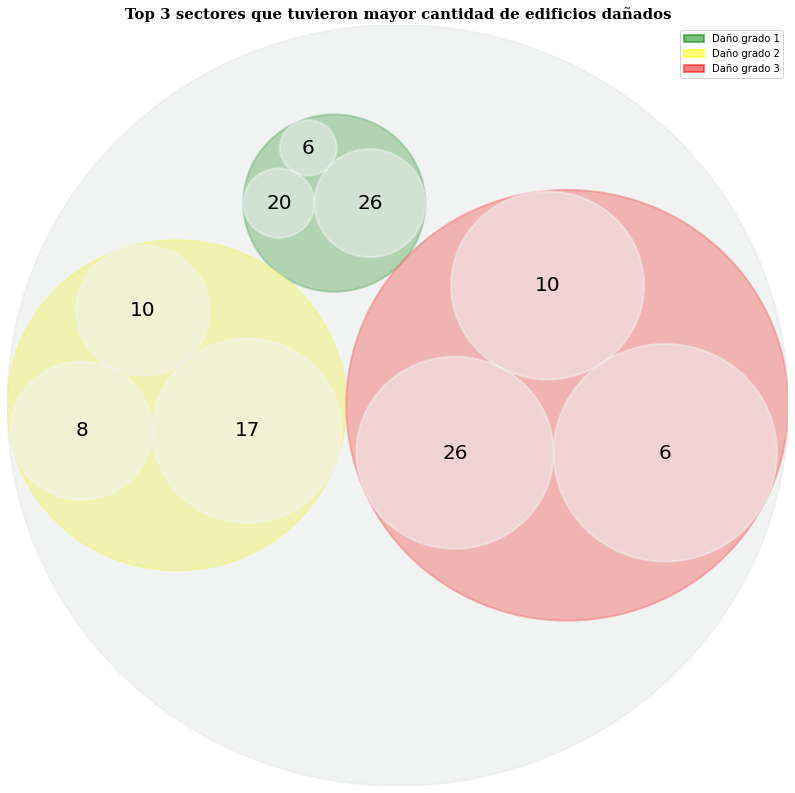

In [792]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.title('Top 3 sectores que tuvieron mayor cantidad de edificios dañados',fontdictTitle)
#ax.set_title('Top 3 sectores según el daño que recibieron los edificios')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

condicion = 0
# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    if condicion == 0:
      ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color='green'))   
      condicion += 1
    elif condicion == 1:
      ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color='yellow'))
      condicion+= 1
    else: ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color='red'))

    plt.annotate(label, (x,y ), va ='center',ha='center', color="black",size='15')

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue   
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color='white'))
    plt.annotate(label, (x,y ), va ='center',ha='center', color="black",size='20')
    
# Print labels for the continents
for circle in circles:
    if circle.level != 1:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#E5E8E8"))

#plt.legend(('sector 1','sector 2','sector 3'),loc = 'upper right')
plt.legend(('Daño grado 1','Daño grado 2','Daño grado 3'),loc = 'upper right')

### Top 5 porcentaje destrucción grado 3

¿Existe algun contraste entre las zonas que tuvieron destrucción grado 1 y las que tuvieron grado 3? ¿Que caracteristicas se diferencian? ¿Pueden haber sido determinantes?
- Se tomaron las caracteristicas consideredas como relevantes para el daño.
- Poner un grafico al lado del otro, comparar y sacar deducciones.
- Si hay contraste, evaular y relacionar datos  }
- Para los caracteres ascii no hay una clara diferenciación asi que se podría dejarlos de lado?

In [793]:
#Pido que tenga mas de 2000 edificios en esa zona para evitar datos con poca cantidad de edificios que
#desiquilibrarian la estadistica. 10000 porque es el 5% del total de edificios
mitadDestruida = porcentajeDestruc.loc[(porcentajeDestruc.porcentaje >= 39) & (porcentajeDestruc.cant_edificios > 10000),:]
mitadDestruida

,geo_level_1_id,cant_edificios_rotos,cant_edificios,porcentaje
8,8,9913,19080,51.954927
10,10,8761,22079,39.680239
17,17,17615,21813,80.754596
21,21,8710,14889,58.499563
27,27,6060,12532,48.356208


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


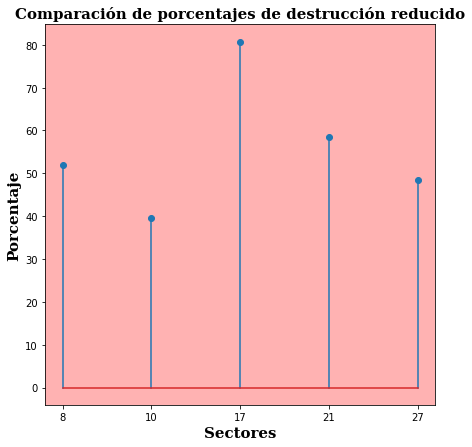

In [794]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (7,7) 
plt.title("Comparación de porcentajes de destrucción reducido", 
          fontdictTitle)
plt.xlabel('Sectores',fontdict=fontdictAxes)
plt.ylabel('Porcentaje',fontdict=fontdictAxes)

#sorted = mitadDestruida.sort_values(by='porcentaje')
my_range=range(0,len(mitadDestruida.index))

# Make the plot
plt.stem(mitadDestruida['porcentaje'])
plt.xticks(my_range, mitadDestruida['geo_level_1_id'])
ax=plt.gca()
ax.set_facecolor('#FFB2B2')

In [795]:
idZonaDestruida = mitadDestruida['geo_level_1_id'].to_list()
idZonaDestruida

[8, 10, 17, 21, 27]

In [796]:
zonasMasDestruidas = df.loc[((df['geo_level_1_id'] == 8) | (df['geo_level_1_id'] == 17) | (df['geo_level_1_id'] == 21)
 | (df['geo_level_1_id'] == 27) | (df['geo_level_1_id'] == 10)),:]
zonasMasDestruidas

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
1,28830,2,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
5,333020,2,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
10,7962,3,17,1119,12188,2,20,9,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
11,452227,2,17,1275,4004,1,10,8,4,t,u,n,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260594,159555,2,27,181,1537,6,0,13,12,t,r,n,f,x,j,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260595,827012,3,8,268,4718,2,20,8,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [797]:
colsPromedios = ['geo_level_1_id','count_floors_pre_eq','age','area_percentage','height_percentage']
promedios = zonasMasDestruidas.loc[:,colsPromedios]
promedios

,geo_level_1_id,count_floors_pre_eq,age,area_percentage,height_percentage
1,8,2,10,8,7
2,21,2,10,5,5
5,8,2,10,9,5
10,17,2,20,9,6
11,17,1,10,8,4
...,...,...,...,...,...
260594,27,6,0,13,12
260595,8,2,20,8,5
260597,17,2,0,6,5
260598,17,3,55,6,7


In [798]:
aux = mitadDestruida.loc[:,['geo_level_1_id','cant_edificios']]
promedios = promedios.groupby('geo_level_1_id').sum().reset_index().merge(aux)
promedios['prom_edad'] = promedios.age/promedios.cant_edificios
promedios['prom_pisos'] = promedios.count_floors_pre_eq/promedios.cant_edificios
promedios['prom_altura'] = promedios.height_percentage/promedios.cant_edificios
promedios['prom_area'] = promedios.area_percentage/promedios.cant_edificios
promedios

,geo_level_1_id,count_floors_pre_eq,age,area_percentage,height_percentage,cant_edificios,prom_edad,prom_pisos,prom_altura,prom_area
0,8,42217,447790,146778,109020,19080,23.469078,2.212631,5.713836,7.692767
1,10,45788,503950,148285,113763,22079,22.824856,2.073826,5.152543,6.716110
2,17,50513,498900,175965,124719,21813,22.871682,2.315729,5.717645,8.066978
3,21,37612,327890,109635,84528,14889,22.022298,2.526160,5.677211,7.363490
4,27,33158,567720,121061,84459,12532,45.301628,2.645867,6.739467,9.660150


##### Edad promedio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


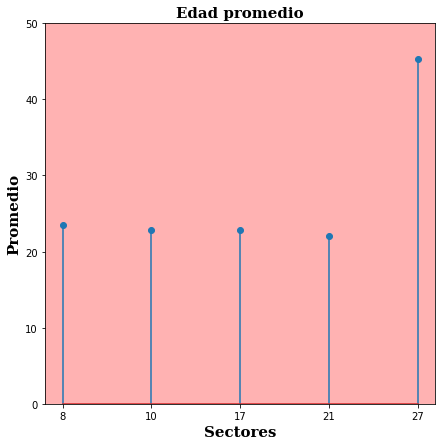

In [799]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (7,7) 
plt.title("Edad promedio", 
          fontdictTitle)
plt.xlabel('Sectores',fontdict=fontdictAxes)
plt.ylabel('Promedio',fontdictAxes)
plt.ylim(0,50)

my_range=range(0,len(promedios.index))

# Make the plot
plt.stem(promedios['prom_edad'])
plt.xticks(my_range, promedios['geo_level_1_id'])
ax=plt.gca()
ax.set_facecolor('#FFB2B2')

#### Altura promedio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


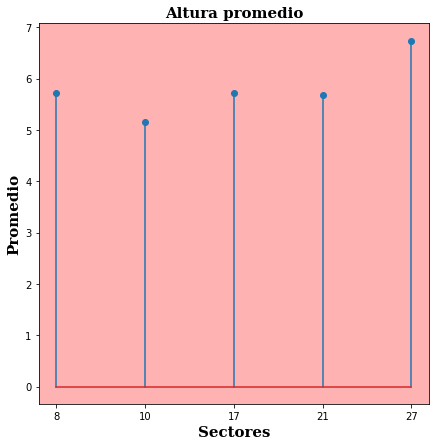

In [800]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (7,7) 
plt.title("Altura promedio", 
          fontdictTitle)
plt.xlabel('Sectores',fontdict=fontdictAxes)
plt.ylabel('Promedio',fontdictAxes)

my_range=range(0,len(promedios.index))

# Make the plot
plt.stem(promedios['prom_altura'])
plt.xticks(my_range, promedios['geo_level_1_id'])
ax=plt.gca()
ax.set_facecolor('#FFB2B2')

#### Area promedio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


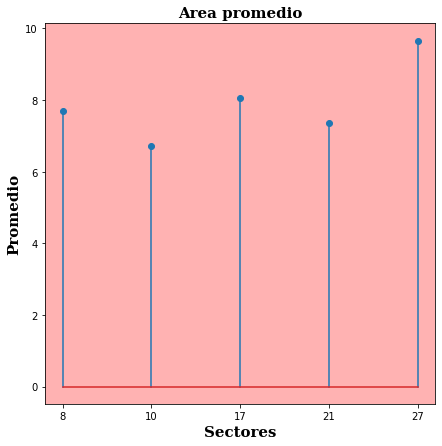

In [801]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (7,7) 
plt.title("Area promedio", 
          fontdictTitle)
plt.xlabel('Sectores',fontdict=fontdictAxes)
plt.ylabel('Promedio',fontdictAxes)

my_range=range(0,len(promedios.index))

# Make the plot
plt.stem(promedios['prom_area'])
plt.xticks(my_range, promedios['geo_level_1_id'])
ax=plt.gca()
ax.set_facecolor('#FFB2B2')

#### Cantidad de pisos promedio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


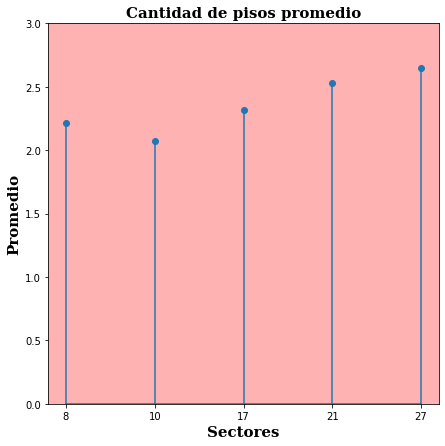

In [802]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (7,7) 
plt.title("Cantidad de pisos promedio", 
          fontdictTitle)
plt.xlabel('Sectores',fontdict=fontdictAxes)
plt.ylabel('Promedio',fontdictAxes)
plt.ylim(0,3)

my_range=range(0,len(promedios.index))

# Make the plot
plt.stem(promedios['prom_pisos'])
plt.xticks(my_range, promedios['geo_level_1_id'])
ax=plt.gca()
ax.set_facecolor('#FFB2B2')

#### Caracteristicas de los ascii

In [803]:
caracAscii = zonasMasDestruidas.loc[:,['geo_level_1_id','land_surface_condition','foundation_type',
                                      'ground_floor_type','other_floor_type','plan_configuration']]
caracAscii.columns = ['sector','tipo de suelo','tipo de cimiento','tipo construccion planta baja',
                      'tipo construccion otros pisos','formato de la construccion']
caracAscii['valor'] = 1
caracAscii

,sector,tipo de suelo,tipo de cimiento,tipo construccion planta baja,tipo construccion otros pisos,formato de la construccion,valor
1,8,o,r,x,q,d,1
2,21,t,r,f,x,d,1
5,8,t,r,f,q,d,1
10,17,t,r,f,q,d,1
11,17,t,u,v,j,d,1
...,...,...,...,...,...,...,...
260594,27,t,r,f,x,d,1
260595,8,t,r,f,q,d,1
260597,17,t,r,f,q,d,1
260598,17,t,r,f,q,d,1


##### ascii de land_surface_condition



In [804]:
asciiSurface = caracAscii.loc[:,['sector','tipo de suelo','valor']]
asciiSurface = asciiSurface.pivot_table(values='valor',index='sector',columns='tipo de suelo',aggfunc='count')
asciiSurface

tipo de suelo,n,o,t
sector,,,
8,3500,963,14617
10,2981,526,18572
17,2997,739,18077
21,1132,168,13589
27,1321,332,10879


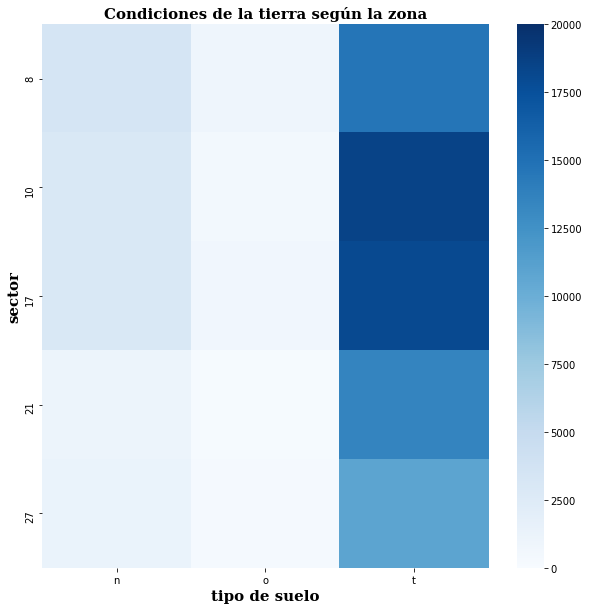

In [805]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (10,10) 
plt.title("Condiciones de la tierra según la zona", 
          fontdictTitle)
plt.xlabel('Condiciones de la tierra',fontdict=fontdictAxes)
plt.ylabel('Sector',fontdict=fontdictAxes)

p1 = sns.heatmap(asciiSurface, cmap='Blues',vmin = 0, vmax = 20000)

##### ascii de foundation_type



In [806]:
asciiFoundation = caracAscii.loc[:,['sector','tipo de cimiento','valor']]
asciiFoundation = asciiFoundation.pivot_table(values='valor',index='sector',columns='tipo de cimiento',aggfunc='count')
asciiFoundation

tipo de cimiento,h,i,r,u,w
sector,,,,,
8,31,743,17528,740,38
10,73,1108,19754,855,289
17,32,716,20265,743,57
21,15,280,14138,374,82
27,40,568,10869,1008,47


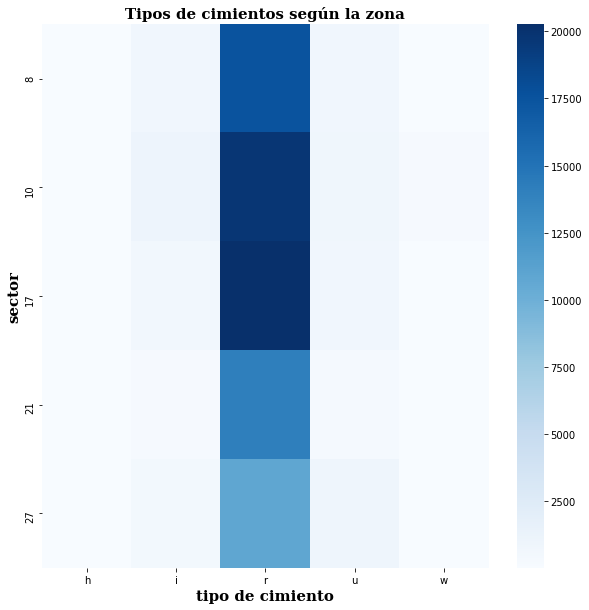

In [807]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (10,10) 
plt.title("Tipos de cimientos según la zona", 
          fontdictTitle)
plt.xlabel('Tipo cimiento',fontdict=fontdictAxes)
plt.ylabel('Sector',fontdict=fontdictAxes)

p1 = sns.heatmap(asciiFoundation, cmap='Blues')

##### ascii de plan_configuration



In [808]:
asciiConfiguration = caracAscii.loc[:,['sector','formato de la construccion','valor']]
asciiConfiguration = asciiConfiguration.pivot_table(values='valor',index='sector',columns='formato de la construccion',aggfunc='count')
asciiConfiguration

formato de la construccion,a,c,d,f,m,n,o,q,s,u
sector,,,,,,,,,,
8,11.0,13.0,18149.0,4.0,1.0,4.0,4.0,747.0,13.0,134.0
10,41.0,22.0,21466.0,1.0,NaN,3.0,9.0,382.0,19.0,136.0
17,4.0,12.0,20974.0,2.0,3.0,2.0,8.0,706.0,16.0,86.0
21,4.0,17.0,14468.0,2.0,NaN,1.0,6.0,228.0,5.0,158.0
27,12.0,34.0,11704.0,2.0,8.0,2.0,10.0,376.0,26.0,358.0


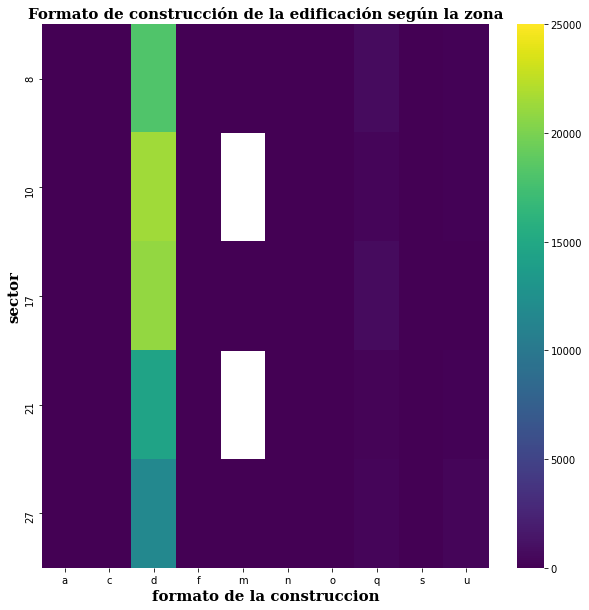

In [809]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (10,10) 
plt.title("Formato de construcción de la edificación según la zona", 
          fontdictTitle)
plt.xlabel('Condiciones de la tierra',fontdict=fontdictAxes)
plt.ylabel('Sector',fontdict=fontdictAxes)

p1 = sns.heatmap(asciiConfiguration, cmap='viridis',vmin = 0, vmax = 25000)

### Top 5 porcentaje destrucción grado 1

In [810]:
mayorGrado1 = porcentajeDestruc1.loc[(porcentajeDestruc.cant_edificios > 10000),:].nlargest(5,'porcentaje')
mayorGrado1

,geo_level_1_id,cant_edificios_rotos,cant_edificios,porcentaje
26,26,8028,22615,35.498563
20,20,3311,17216,19.232110
6,6,2108,24381,8.646077
10,10,1211,22079,5.484850
7,7,1033,18994,5.438560


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


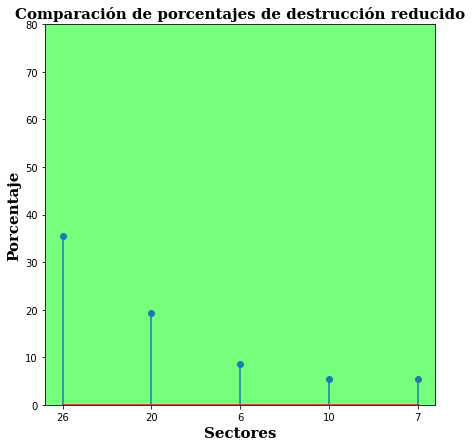

In [811]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (7,7) 
plt.title("Comparación de porcentajes de destrucción reducido", 
          fontdictTitle)
plt.xlabel('Sectores',fontdict=fontdictAxes)
plt.ylabel('Porcentaje',fontdictAxes)
plt.ylim(0,80)

#sorted = mitadDestruida.sort_values(by='porcentaje')
my_range=range(0,len(mayorGrado1.index))

# Make the plot
plt.stem(mayorGrado1['porcentaje'])
plt.xticks(my_range, mayorGrado1['geo_level_1_id'])
ax=plt.gca()
ax.set_facecolor('xkcd:lightgreen')

In [812]:
idZonaDestruida2 = mayorGrado1['geo_level_1_id'].to_list()
idZonaDestruida2

[26, 20, 6, 10, 7]

In [813]:
zonasMasDestruidas2 = df.loc[((df['geo_level_1_id'] == 26) | (df['geo_level_1_id'] == 20) | (df['geo_level_1_id'] == 6)
 | (df['geo_level_1_id'] == 7) | (df['geo_level_1_id'] == 10)),:]
zonasMasDestruidas2

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
7,475515,1,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
9,989500,1,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
16,633759,2,6,706,12267,2,5,7,5,t,r,n,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
18,354011,2,26,1401,3904,1,20,12,3,t,u,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260589,858025,1,6,673,12181,3,15,11,11,t,i,x,v,s,s,d,0,0,0,0,0,0,0,0,1,0,0,w,1,0,0,0,0,0,0,0,0,0,0,0
260590,695987,2,20,922,10283,2,5,7,5,t,r,n,f,q,s,d,0,0,1,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260591,560805,3,20,368,5980,1,25,5,3,n,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
260592,207683,2,10,1382,1903,2,25,5,5,t,r,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [814]:
colsPromedios2 = ['geo_level_1_id','count_floors_pre_eq','age','area_percentage','height_percentage']
promedios2 = zonasMasDestruidas2.loc[:,colsPromedios]
promedios2

,geo_level_1_id,count_floors_pre_eq,age,area_percentage,height_percentage
0,6,2,30,6,5
7,20,2,0,8,6
9,26,1,0,13,4
16,6,2,5,7,5
18,26,1,20,12,3
...,...,...,...,...,...
260589,6,3,15,11,11
260590,20,2,5,7,5
260591,20,1,25,5,3
260592,10,2,25,5,5


In [815]:
aux = mayorGrado1.loc[:,['geo_level_1_id','cant_edificios']]
promedios2 = promedios2.groupby('geo_level_1_id').sum().reset_index().merge(aux)
promedios2['prom_edad'] = promedios2.age/promedios2.cant_edificios
promedios2['prom_pisos'] = promedios2.count_floors_pre_eq/promedios2.cant_edificios
promedios2['prom_altura'] = promedios2.height_percentage/promedios2.cant_edificios
promedios2['prom_area'] = promedios2.area_percentage/promedios2.cant_edificios
promedios2

,geo_level_1_id,count_floors_pre_eq,age,area_percentage,height_percentage,cant_edificios,prom_edad,prom_pisos,prom_altura,prom_area
0,6,54144,805090,201920,147694,24381,33.021205,2.220746,6.057750,8.281859
1,7,37303,462295,149162,95292,18994,24.339002,1.963936,5.016953,7.853112
2,10,45788,503950,148285,113763,22079,22.824856,2.073826,5.152543,6.716110
3,20,31477,220290,132821,87365,17216,12.795655,1.828357,5.074640,7.714974
4,26,38003,475390,205914,109014,22615,21.021004,1.680433,4.820429,9.105196


#### Edad promedio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


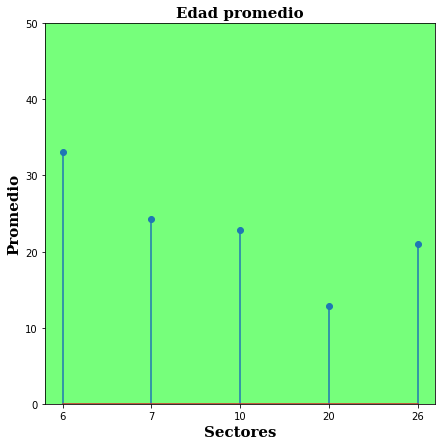

In [816]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (7,7) 
plt.title("Edad promedio", 
          fontdictTitle)
plt.xlabel('Sectores',fontdict=fontdictAxes)
plt.ylabel('Promedio',fontdictAxes)
plt.ylim(0,50)

my_range=range(0,len(promedios2.index))

# Make the plot
plt.stem(promedios2['prom_edad'])
plt.xticks(my_range, promedios2['geo_level_1_id'])
ax=plt.gca()
ax.set_facecolor('xkcd:lightgreen')

#### Altura promedio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


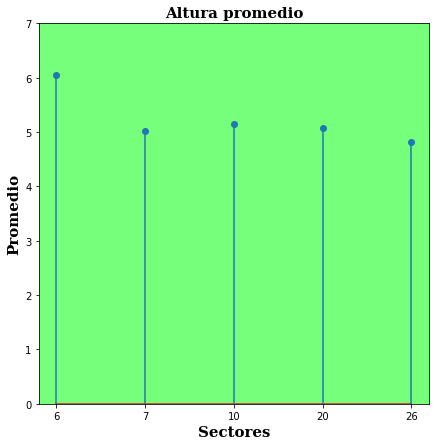

In [817]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (7,7) 
plt.title("Altura promedio", 
          fontdictTitle)
plt.xlabel('Sectores',fontdict=fontdictAxes)
plt.ylabel('Promedio',fontdictAxes)
plt.ylim(0,7)
my_range=range(0,len(promedios2.index))

# Make the plot
plt.stem(promedios2['prom_altura'])
plt.xticks(my_range, promedios2['geo_level_1_id'])
ax=plt.gca()
ax.set_facecolor('xkcd:lightgreen')

#### Area promedio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


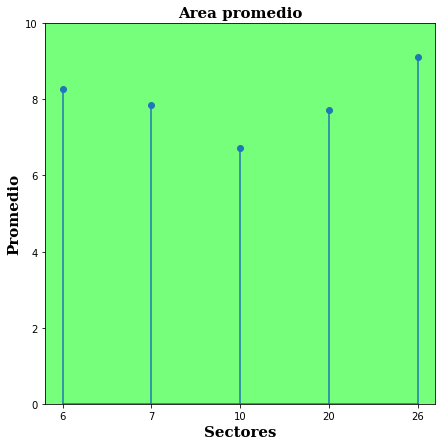

In [818]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (7,7) 
plt.title("Area promedio", 
          fontdictTitle)
plt.xlabel('Sectores',fontdict=fontdictAxes)
plt.ylabel('Promedio',fontdictAxes)
plt.ylim(0,10)


my_range=range(0,len(promedios2.index))

# Make the plot
plt.stem(promedios2['prom_area'])
plt.xticks(my_range, promedios2['geo_level_1_id'])
ax=plt.gca()
ax.set_facecolor('xkcd:lightgreen')

#### Cantidad de pisos promedio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


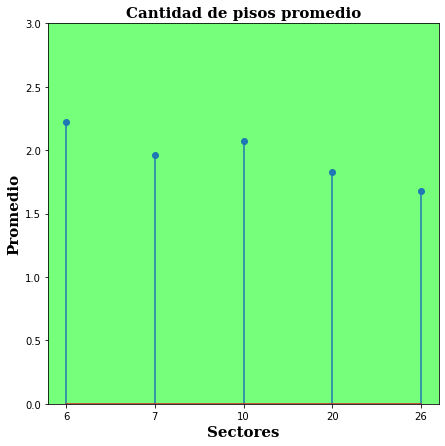

In [819]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (7,7) 
plt.title("Cantidad de pisos promedio", 
          fontdictTitle)
plt.xlabel('Sectores',fontdict=fontdictAxes)
plt.ylabel('Promedio',fontdictAxes)
plt.ylim(0,3)

my_range=range(0,len(promedios2.index))

# Make the plot
plt.stem(promedios2['prom_pisos'])
plt.xticks(my_range, promedios2['geo_level_1_id'])
ax=plt.gca()
ax.set_facecolor('xkcd:lightgreen')

#### Caracteristicas de los ascii

In [820]:
caracAscii2 = zonasMasDestruidas2.loc[:,['geo_level_1_id','land_surface_condition','foundation_type',
                                      'ground_floor_type','other_floor_type','plan_configuration']]
caracAscii2.columns = ['sector','tipo de suelo','tipo de cimiento','tipo construccion planta baja',
                      'tipo construccion otros pisos','formato de la construccion']
caracAscii2['valor'] = 1
caracAscii2

,sector,tipo de suelo,tipo de cimiento,tipo construccion planta baja,tipo construccion otros pisos,formato de la construccion,valor
0,6,t,r,f,q,d,1
7,20,t,w,v,x,u,1
9,26,t,i,v,j,d,1
16,6,t,r,f,q,d,1
18,26,t,u,v,j,d,1
...,...,...,...,...,...,...,...
260589,6,t,i,v,s,d,1
260590,20,t,r,f,q,d,1
260591,20,n,r,f,j,d,1
260592,10,t,r,f,q,d,1


##### ascii de land_surface_condition



In [821]:
asciiSurface2 = caracAscii2.loc[:,['sector','tipo de suelo','valor']]
asciiSurface2 = asciiSurface2.pivot_table(values='valor',index='sector',columns='tipo de suelo',aggfunc='count')
asciiSurface2

tipo de suelo,n,o,t
sector,,,
6,3095,719,20567
7,2569,556,15869
10,2981,526,18572
20,2890,812,13514
26,2570,503,19542


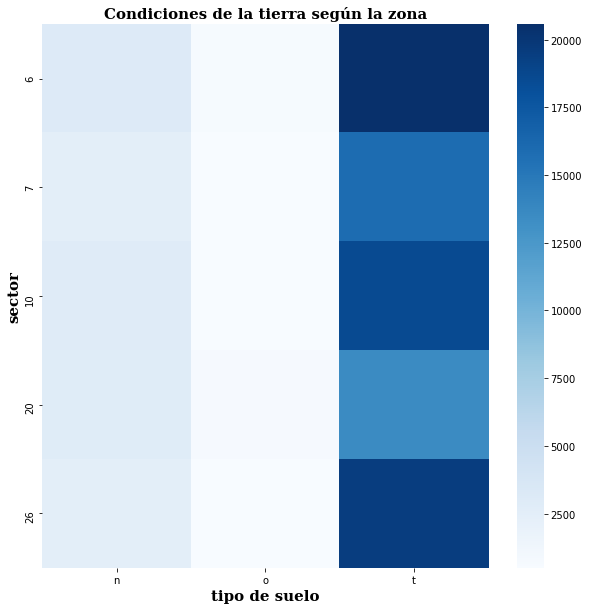

In [822]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (10,10) 
plt.title("Condiciones de la tierra según la zona", 
          fontdictTitle)
plt.xlabel('Condiciones de la tierra',fontdict=fontdictAxes)
plt.ylabel('Sector',fontdict=fontdictAxes)

p1 = sns.heatmap(asciiSurface2, cmap='Blues')

##### ascii de foundation_type



In [823]:
asciiFoundation2 = caracAscii2.loc[:,['sector','tipo de cimiento','valor']]
asciiFoundation2 = asciiFoundation2.pivot_table(values='valor',index='sector',columns='tipo de cimiento',aggfunc='count')
asciiFoundation2

tipo de cimiento,h,i,r,u,w
sector,,,,,
6,58,1755,21148,1240,180
7,201,963,16911,627,292
10,73,1108,19754,855,289
20,247,572,7198,1071,8128
26,119,1551,12502,3442,5001


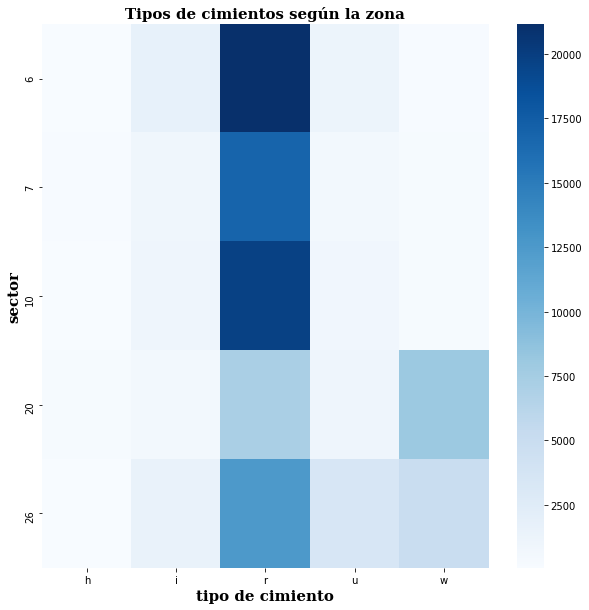

In [824]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (10,10) 
plt.title("Tipos de cimientos según la zona", 
          fontdictTitle)
plt.xlabel('Tipo cimiento',fontdict=fontdictAxes)
plt.ylabel('Sector',fontdict=fontdictAxes)

p1 = sns.heatmap(asciiFoundation2, cmap='Blues')

##### ascii de plan_configuration



In [825]:
asciiConfiguration2 = caracAscii2.loc[:,['sector','formato de la construccion','valor']]
asciiConfiguration2 = asciiConfiguration2.pivot_table(values='valor',index='sector',columns='formato de la construccion',aggfunc='count')
asciiConfiguration2

formato de la construccion,a,c,d,f,m,n,o,q,s,u
sector,,,,,,,,,,
6,12.0,36.0,23611.0,2.0,NaN,1.0,9.0,379.0,17.0,314.0
7,8.0,48.0,18173.0,1.0,2.0,4.0,15.0,525.0,25.0,193.0
10,41.0,22.0,21466.0,1.0,NaN,3.0,9.0,382.0,19.0,136.0
20,43.0,13.0,16029.0,1.0,4.0,7.0,45.0,204.0,89.0,781.0
26,6.0,38.0,21621.0,2.0,12.0,3.0,22.0,478.0,30.0,403.0


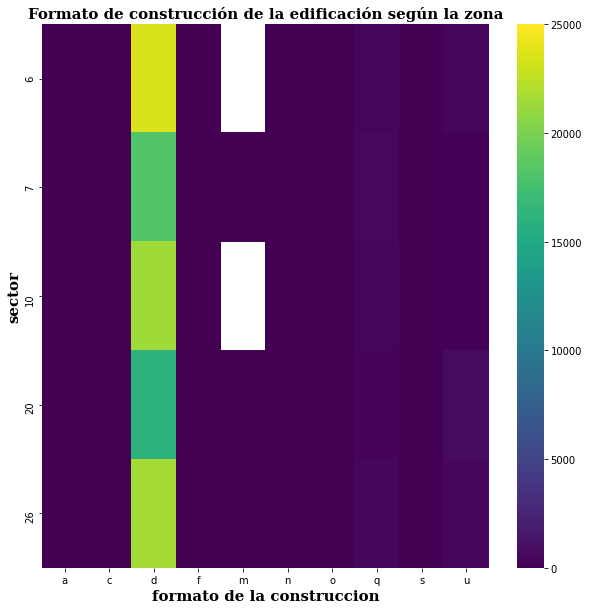

In [826]:
fontdictTitle={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
fontdictAxes={'family': 'serif', 'color' : 'black','weight': 'bold','size':'15'}
plt.rcParams["figure.figsize"] = (10,10) 
plt.title("Formato de construcción de la edificación según la zona", 
          fontdictTitle)
plt.xlabel('Condiciones de la tierra',fontdict=fontdictAxes)
plt.ylabel('Sector',fontdict=fontdictAxes)

p1 = sns.heatmap(asciiConfiguration2, cmap='viridis',vmin = 0, vmax = 25000)

##4.4. Propiedades fisicas

###4.4.1 Altura

####¿Los edificios mas altos sufrieron mas el terremoto?

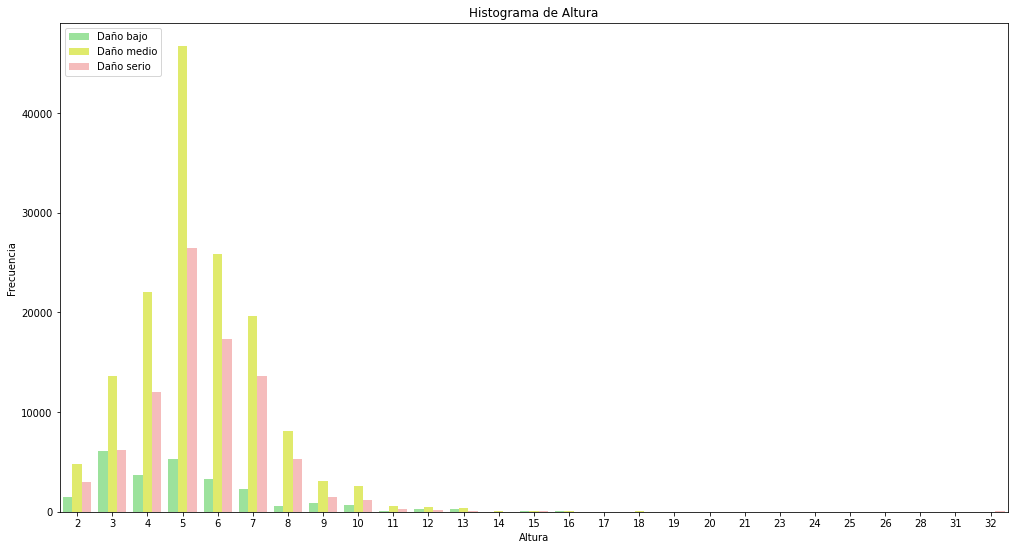

In [827]:
plt.figure(figsize=(17,9))
sns.countplot(x=df["height_percentage"],hue=df["damage_grade"],palette=['lightgreen','#F2FF57','#FFB2B2'])
plt.ylabel("Frecuencia")
plt.xlabel("Altura")
plt.title("Histograma de Altura")
plt.legend(["Daño bajo","Daño medio","Daño serio"])
plt.show()

Se puede observar que a medida que aumenta el porcentaje de altura de la edificacion la diferencia entre el daño serio y el bajo va siendo cada vez mayor predominando el daño serio sobre el bajo. La mayoria de los edificios sufrieron un daño medio.

###4.4.2. Área

####¿Los edificios con mas porcentaje de area sufrieron mas daños?

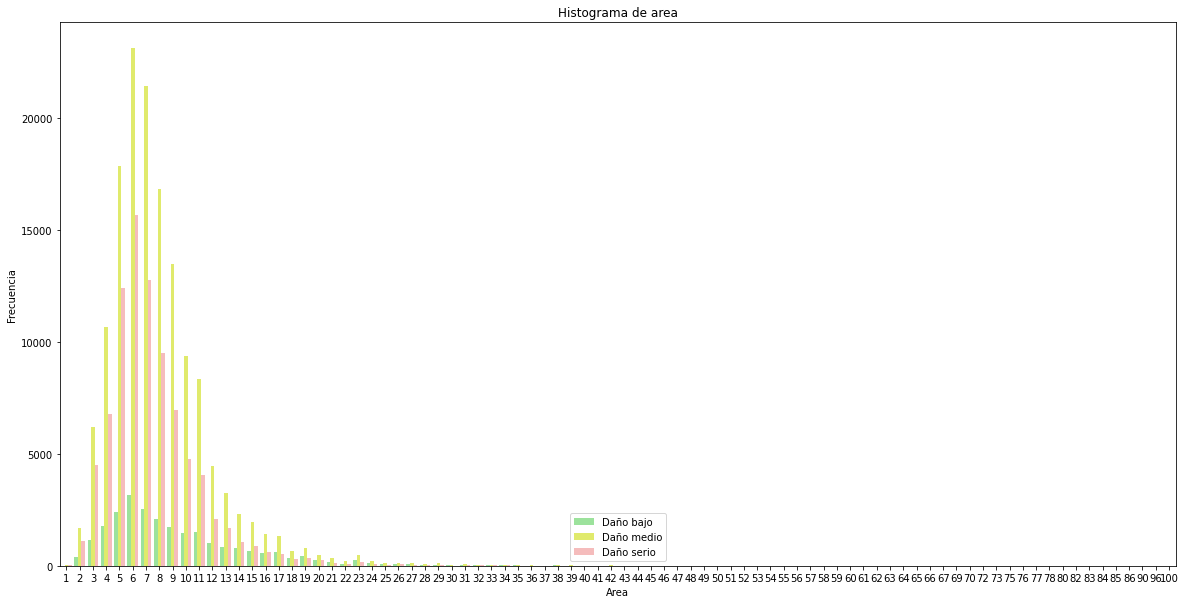

In [828]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["area_percentage"],hue=df["damage_grade"],palette=['lightgreen','#F2FF57','#FFB2B2'])
plt.ylabel("Frecuencia")
plt.xlabel("Area")
plt.title("Histograma de area")
plt.legend(["Daño bajo","Daño medio","Daño serio"])
plt.show()

##4.5. Cantidad de pisos

###¿Los edificios con más pisos sufrieron más el impacto?

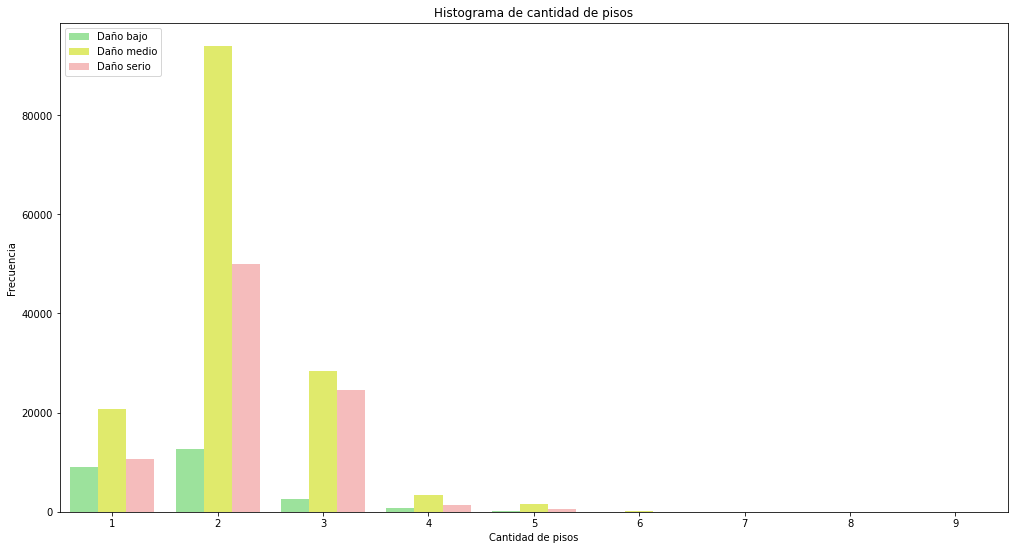

In [829]:
plt.figure(figsize=(17,9))
sns.countplot(x=df["count_floors_pre_eq"],hue=df["damage_grade"],palette=['lightgreen','#F2FF57','#FFB2B2'])
plt.ylabel("Frecuencia")
plt.xlabel("Cantidad de pisos")
plt.title("Histograma de cantidad de pisos")
plt.legend(["Daño bajo","Daño medio","Daño serio"])
plt.show()

##4.6. Uso secundario

###Daño dependiendo si tienen uso secundario o no

In [830]:
df_secondary_use = df[['damage_grade','has_secondary_use']].groupby('damage_grade').sum()
damageTotal = df.groupby('damage_grade').count()[['building_id']].rename(columns={'building_id':'count'})
df_secondary_use['total_damage'] = damageTotal['count']
df_secondary_use['sin_uso_secundario'] = df_secondary_use['total_damage']-df_secondary_use['has_secondary_use']
df_secondary_use = df_secondary_use[['has_secondary_use','sin_uso_secundario']]
df_secondary_use

,has_secondary_use,sin_uso_secundario
damage_grade,,
1,4248,20876
2,17715,130544
3,7193,80025


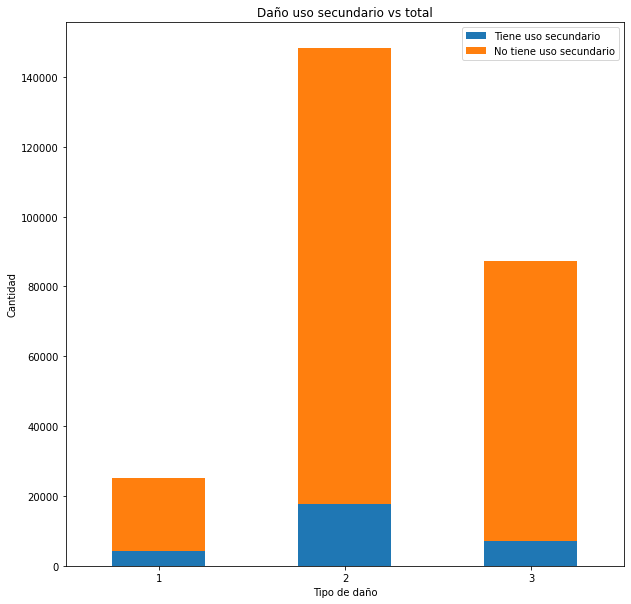

In [831]:
df_secondary_use.plot.bar(stacked=True,rot=360,figsize=(10,10),title='Daño uso secundario vs total')
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Tipo de daño')
ax.legend(['Tiene uso secundario','No tiene uso secundario'])
# Create names on the x axis
#plt.xticks(np.arange(len(porcentajeDestruc)), porcentajeDestruc.geo_level_1_id)

###Segun su uso secundario, ¿cuales edificaciones sufrieron mas los daños?

In [832]:
df_use  = df[['damage_grade','has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]
df_use = df_use.rename(columns={'has_secondary_use_agriculture':'agricultura','has_secondary_use_hotel':'hotel','has_secondary_use_rental':'alquiler',\
                                              'has_secondary_use_institution':'institucion','has_secondary_use_school':'escuela','has_secondary_use_industry':'industria',\
                                              'has_secondary_use_health_post':'puesto de salud','has_secondary_use_gov_office':'oficina de gobierno','has_secondary_use_use_police':'estación de policía',\
                                              'has_secondary_use_other':'otro'})
df_use = df_use.groupby('damage_grade').sum()
df_use = df_use.T.rename(columns={1:'Daño bajo',2:'Daño medio',3:'Daño serio'}).rename_axis(columns='Tipo de daño')
df_use

Tipo de daño,Daño bajo,Daño medio,Daño serio
agricultura,829,10679,5269
hotel,2216,5058,1489
alquiler,877,1051,183
institucion,99,129,17
escuela,30,47,17
industria,59,152,68
puesto de salud,12,32,5
oficina de gobierno,13,21,4
estación de policía,4,12,7
otro,175,852,307


In [833]:
df_use_promedio = df_use.copy()
df_use_promedio['Daño_bajo_promedio'] = df_use_promedio['Daño bajo']*100/(df_use_promedio['Daño bajo']+df_use_promedio['Daño medio']+df_use_promedio['Daño serio'])
df_use_promedio['Daño_medio_promedio'] = df_use_promedio['Daño medio']*100/(df_use_promedio['Daño bajo']+df_use_promedio['Daño medio']+df_use_promedio['Daño serio'])
df_use_promedio['Daño_serio_promedio'] = df_use_promedio['Daño serio']*100/(df_use_promedio['Daño bajo']+df_use_promedio['Daño medio']+df_use_promedio['Daño serio'])

df_use_promedio = df_use_promedio[['Daño_bajo_promedio','Daño_medio_promedio','Daño_serio_promedio']]
df_use_promedio

Tipo de daño,Daño_bajo_promedio,Daño_medio_promedio,Daño_serio_promedio
agricultura,4.941289,63.652620,31.406092
hotel,25.288143,57.719959,16.991898
alquiler,41.544292,49.786831,8.668877
institucion,40.408163,52.653061,6.938776
escuela,31.914894,50.000000,18.085106
industria,21.146953,54.480287,24.372760
puesto de salud,24.489796,65.306122,10.204082
oficina de gobierno,34.210526,55.263158,10.526316
estación de policía,17.391304,52.173913,30.434783
otro,13.118441,63.868066,23.013493


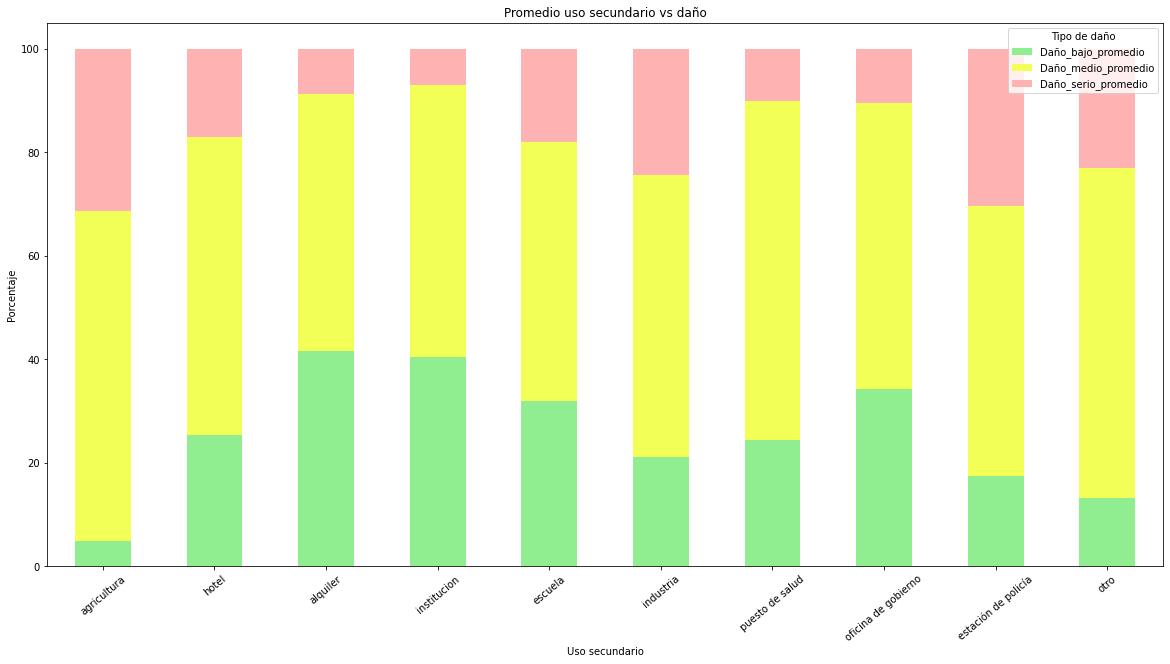

In [834]:
df_use_promedio.plot(kind='bar',stacked=True,figsize=(20,10),rot=40,title='Promedio uso secundario vs daño',color=['lightgreen','#F2FF57','#FFB2B2'])
ax=plt.gca()
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Uso secundario')
ax.set_facecolor('xkcd:white')

Text(0.5, 0, 'Uso secundario')

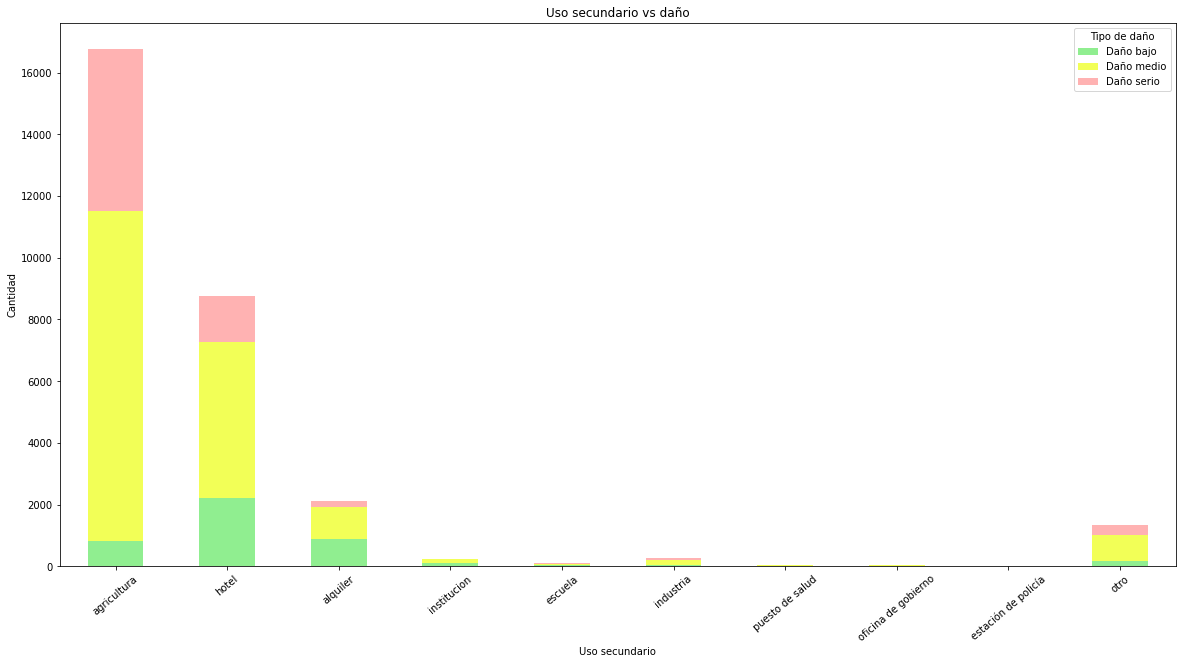

In [835]:
df_use.plot(kind='bar', stacked=True,figsize=(20,10),rot=40,title='Uso secundario vs daño',color=['lightgreen','#F2FF57','#FFB2B2'])
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Uso secundario')
#ax.grid(True)

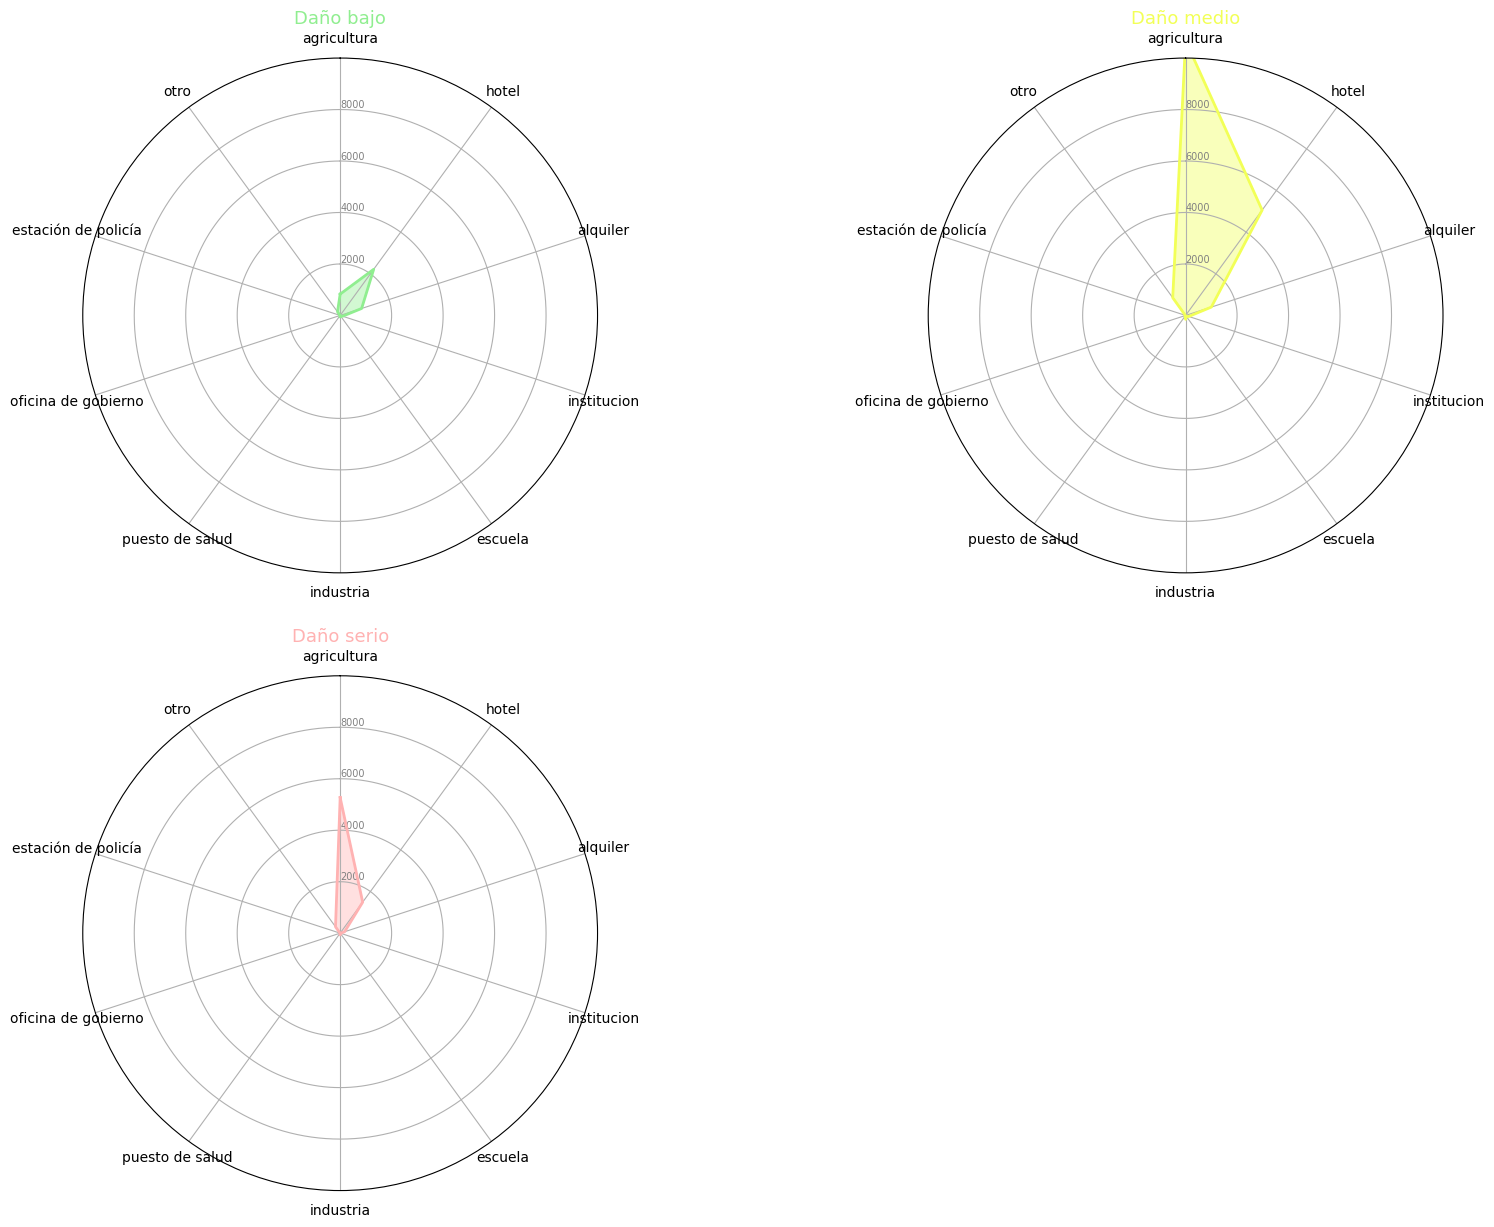

In [836]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df_use_T = df_use.T.reset_index()

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df_use_T)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    #ax = plt.subplot(3,1,row+1, polar=True, )
    ax = plt.subplot(2,2,row+1, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2000,4000,6000,8000], ["2000","4000","6000","8000"], color="grey", size=7)
    plt.ylim(0,10000)

    # Ind1
    values=df_use_T.loc[row].drop('Tipo de daño').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=13, color=color, y=1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=100
plt.figure(figsize=(20,15), dpi=my_dpi)
 
condicion = 0
# Loop to plot
for row in range(0, len(df_use_T.index)):
      if condicion == 0:
        make_spider(row=row, title=df_use_T['Tipo de daño'][row], color='lightgreen')
        condicion += 1
      elif condicion == 1:
        make_spider( row=row, title=df_use_T['Tipo de daño'][row], color='#F2FF57')
        condicion+= 1
      else: make_spider( row=row, title=df_use_T['Tipo de daño'][row], color='#FFB2B2')


###Uso con más/menos daño

In [837]:
use  = df[['damage_grade','has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]
 
use = use.rename(columns={'has_secondary_use_agriculture':'agricultura','has_secondary_use_hotel':'hotel','has_secondary_use_rental':'alquiler',\
                                              'has_secondary_use_institution':'institucion','has_secondary_use_school':'escuela','has_secondary_use_industry':'industria',\
                                              'has_secondary_use_health_post':'puesto de salud','has_secondary_use_gov_office':'oficina de gobierno','has_secondary_use_use_police':'estación de policía',\
                                              'has_secondary_use_other':'otro'})

use_by_damage = use.groupby('damage_grade').sum()
use_by_damage

,agricultura,hotel,alquiler,institucion,escuela,industria,puesto de salud,oficina de gobierno,estación de policía,otro
damage_grade,,,,,,,,,,
1,829,2216,877,99,30,59,12,13,4,175
2,10679,5058,1051,129,47,152,32,21,12,852
3,5269,1489,183,17,17,68,5,4,7,307


In [838]:
use_by_damage_agricultura= use_by_damage.reset_index().loc[:,['damage_grade','agricultura']]
use_by_damage_agricultura

,damage_grade,agricultura
0,1,829
1,2,10679
2,3,5269


In [839]:
use_by_damage_alquiler = use_by_damage.reset_index().loc[:,['damage_grade','alquiler']]
use_by_damage_alquiler

,damage_grade,alquiler
0,1,877
1,2,1051
2,3,183


In [840]:
use_by_damage_institucion = use_by_damage.reset_index().loc[:,['damage_grade','institucion']]
use_by_damage_institucion

,damage_grade,institucion
0,1,99
1,2,129
2,3,17


##4.7. Social

###¿Cuántas familias perdieron su hogar?

In [841]:
families_by_damage = df[['damage_grade','count_families']].groupby('damage_grade').sum()

In [842]:
families_by_damage

,count_families
damage_grade,
1,22991
2,145593
3,87834


In [843]:
total_families = df[['damage_grade','count_families']].groupby('damage_grade').sum().sum()

In [844]:
families_by_damage_aux_ordered = families_by_damage['count_families'].sort_values()

In [845]:
families_by_damage_aux_ordered

damage_grade
1     22991
3     87834
2    145593
Name: count_families, dtype: int64

In [846]:
count_families_ordered = families_by_damage_aux_ordered.values

In [847]:
count_families_ordered

array([ 22991,  87834, 145593])

In [848]:
damage_ordered = families_by_damage_aux_ordered.index.astype(str)

In [849]:
damage_ordered

Index(['1', '3', '2'], dtype='object', name='damage_grade')

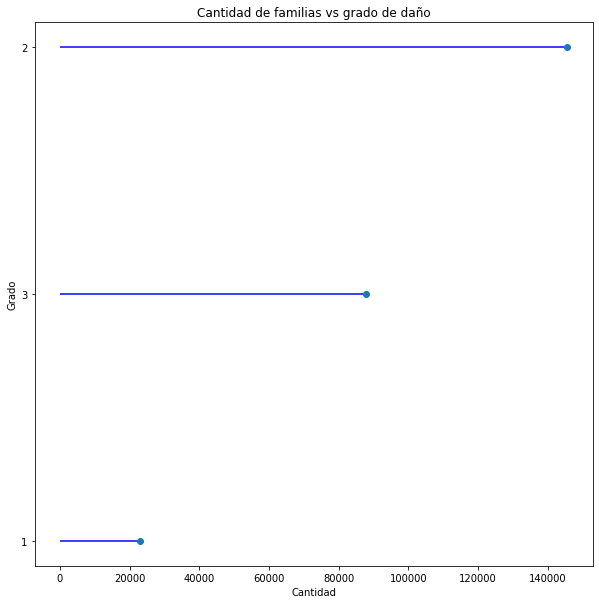

In [850]:
plt.hlines(y=damage_ordered, xmin=0, xmax=count_families_ordered, color='blue')
plt.plot(count_families_ordered ,damage_ordered,'o')
 
plt.title("Cantidad de familias vs grado de daño", loc='center')
plt.xlabel('Cantidad')
plt.ylabel('Grado')

plt.show()

Podemos observar que fueron pocas las familias que fueron afectadas tras el fenómeno ocurrido. 

#5. Relación entre los daños


In [851]:
df_altura_pisos = df.loc[(df['count_floors_pre_eq'] >= 2) & (df['height_percentage'] >= 4)].groupby('damage_grade').count()[['building_id']].rename(columns={'building_id':''}).T
df_altura_pisos

damage_grade,1,2,3
,15846,126244,75977


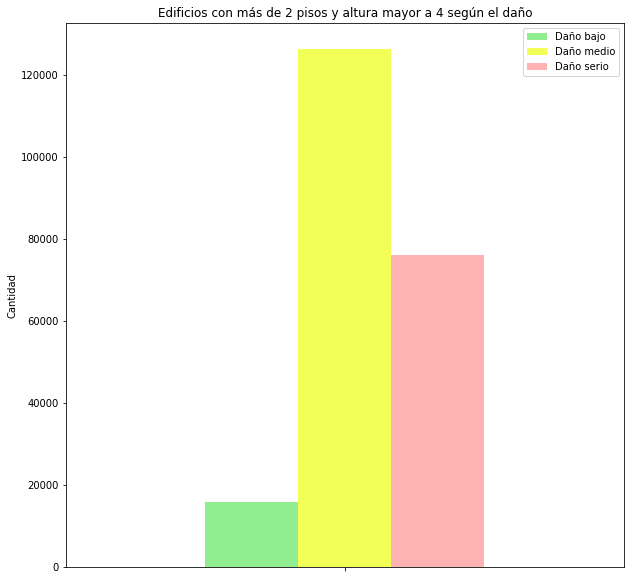

In [852]:
coloresDaño = ['lightgreen','#F2FF57','#FFB2B2']
df_altura_pisos.plot.bar(figsize=(10,10),rot=360,title='Edificios con más de 2 pisos y altura mayor a 4 según el daño',color=coloresDaño)
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.legend(['Daño bajo','Daño medio','Daño serio'])


In [853]:
df_mas_daño_antiguedad = df.loc[(df['count_floors_pre_eq'] >= 2) & (df['height_percentage'] >= 4) & (df['age'] >= 35)].groupby('damage_grade').count()[['building_id']].rename(columns={'building_id':''}).T
df_mas_daño_antiguedad

damage_grade,1,2,3
,1096,27937,18126


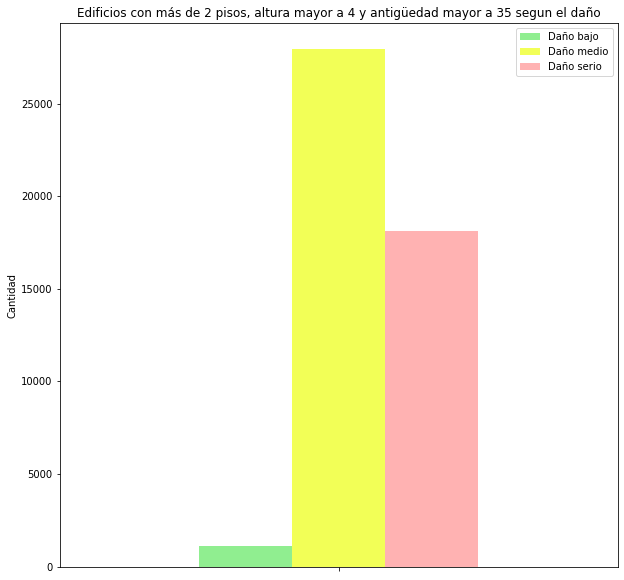

In [854]:
coloresDaño = ['lightgreen','#F2FF57','#FFB2B2']
df_mas_daño_antiguedad.plot.bar(figsize=(10,10),rot=360,title='Edificios con más de 2 pisos, altura mayor a 4 y antigüedad mayor a 35 segun el daño',color=coloresDaño)
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.legend(['Daño bajo','Daño medio','Daño serio'])

In [855]:
df_mas_daño = df.loc[(df['count_floors_pre_eq'] >= 2) & (df['height_percentage'] >= 4) & (df['age'] >= 35) & (df['has_superstructure_stone_flag'] == 1)].groupby('damage_grade').count()[['building_id']].rename(columns={'building_id':''}).T
df_mas_daño

damage_grade,1,2,3
,16,853,804


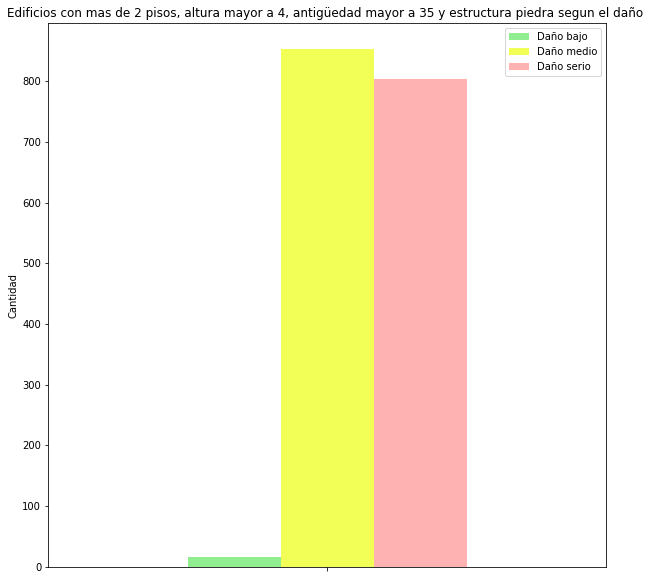

In [856]:
coloresDaño = ['lightgreen','#F2FF57','#FFB2B2']
df_mas_daño.plot.bar(figsize=(10,10),rot=360,title='Edificios con mas de 2 pisos, altura mayor a 4, antigüedad mayor a 35 y estructura piedra segun el daño ',color=coloresDaño)
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.legend(['Daño bajo','Daño medio','Daño serio'])
